In [1]:
#Importing the necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.integrate import odeint
import lmfit
from lmfit.lineshapes import gaussian,lorentzian
import warnings
warnings.filterwarnings('ignore')

Since for additional analysis, we are allowed to use the external dataset that are publicly available,

We used different datasets for our additional analysis (the source of each dataset is given in data_source.txt file)

In [4]:
#Loading the datasets
train_data = pd.read_csv('data_preprocessed.csv')
icu_beds = pd.read_csv('beds.csv')
pop_by_age = pd.read_csv('population_by_age.csv')
state = pd.read_csv('stateFIPS.csv')
death_data = pd.read_csv('us-states_deaths.csv')
vac_data = pd.read_csv('us_state_vaccinations.csv')

Description of Different Datasets

1.train_data is the data provided to us

2.icu_beds contains the ICU beds state wise initially

3.pop_by_age contains the state wise popuation of different category of people (by age)

4.state contains the with different state code with their respective name

5.death_data contains the overall deaths due to covid 19 state wise 

6.Similarly vac_data contains the state wise data of people who are vaccinated 

7.probablities contains the differnet kinds of probabilities of people of different age category due to pandemic

In [50]:
probabilities = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/probabilities.csv")

In [5]:
pop_by_age

Location  Children 0-18  Adults 19-25  Adults 26-34  \
0          United States          0.236         0.087         0.125   
1                Alabama          0.237         0.087         0.115   
2                 Alaska          0.259         0.093         0.139   
3                Arizona          0.240         0.093         0.121   
4               Arkansas          0.247         0.087         0.115   
5             California          0.237         0.092         0.137   
6               Colorado          0.231         0.089         0.141   
7            Connecticut          0.217         0.086         0.113   
8               Delaware          0.218         0.081         0.118   
9   District of Columbia          0.195         0.090         0.216   
10               Florida          0.209         0.080         0.114   
11               Georgia          0.253         0.089         0.122   
12                Hawaii          0.228         0.072         0.116   
13                 Idaho          0.267         0.085         0.120   
14              Illinois          0.237         0.087         0.126   
15               Indiana          0.246         0.091         0.118   
16                  Iowa          0.244         0.089         0.114   
17                Kansas          0.257         0.092         0.116   
18              Kentucky          0.237         0.089         0.114   
19             Louisiana          0.250         0.088         0.123   
20                 Maine          0.190         0.075         0.110   
21              Maryland          0.233         0.081         0.123   
22         Massachusetts          0.209         0.087         0.132   
23              Michigan          0.227         0.091         0.118   
24             Minnesota          0.243         0.082         0.125   
25           Mississippi          0.254         0.089         0.110   
26              Missouri          0.236         0.085         0.121   
27               Montana          0.226         0.085         0.114   
28              Nebraska          0.260         0.088         0.122   
29                Nevada          0.235         0.083         0.131   
30         New Hampshire          0.201         0.078         0.115   
31            New Jersey          0.230         0.082         0.117   
32            New Mexico          0.240         0.090         0.117   
33              New York          0.217         0.086         0.134   
34        North Carolina          0.235         0.086         0.118   
35          North Dakota          0.245         0.102         0.137   
36                  Ohio          0.234         0.085         0.119   
37              Oklahoma          0.256         0.091         0.123   
38                Oregon          0.214         0.084         0.128   
39          Pennsylvania          0.219         0.079         0.123   
40          Rhode Island          0.207         0.088         0.127   
41        South Carolina          0.230         0.082         0.116   
42          South Dakota          0.257         0.082         0.115   
43             Tennessee          0.235         0.086         0.124   
44                 Texas          0.272         0.094         0.130   
45                  Utah          0.308         0.109         0.132   
46               Vermont          0.195         0.086         0.111   
47              Virginia          0.234         0.084         0.120   
48            Washington          0.230         0.084         0.138   
49         West Virginia          0.212         0.081         0.105   
50             Wisconsin          0.230         0.085         0.116   
51               Wyoming          0.251         0.083         0.117   
52           Puerto Rico          0.196         0.099         0.105   

    Adults 35-54  Adults 55-64    65+  Total  
0          0.255         0.132  0.165    1.0  
1          0.251         0.135  0.175    1.0  
2          0.246         0.132  0.130   

In [51]:
probabilities

Age  prob_I_to_ICU_1  prob_ICU_to_Death_1  prob_I_to_ICU_2  \
0     0_9            0.001                 0.00          0.00100   
1   10_19            0.003                 0.00          0.00300   
2   20_29            0.009                 0.05          0.00600   
3   30_39            0.025                 0.06          0.00900   
4   40_49            0.030                 0.10          0.02500   
5   50_59            0.050                 0.26          0.03560   
6   60_69            0.070                 0.57          0.05926   
7   70_79            0.100                 0.86          0.10100   
8   80_89            0.140                 0.95          0.14100   
9  90_100            0.160                 0.98          0.16000   

   prob_ICU_to_Death_2  
0                0.000  
1                0.000  
2                0.000  
3                0.000  
4                0.120  
5                0.365  
6                0.675  
7                0.850  
8                0.950  
9                0.990

In [6]:
icu_beds

Location  State/Local Government  Non-Profit  For-Profit  \
0          United States                     0.3         1.7         0.4   
1                Alabama                     1.4         0.8         0.9   
2                 Alaska                     0.3         1.5         0.4   
3                Arizona                     0.1         1.3         0.5   
4               Arkansas                     0.3         2.2         0.7   
5             California                     0.3         1.2         0.3   
6               Colorado                     0.4         1.1         0.4   
7            Connecticut                     0.1         2.0         NaN   
8               Delaware                     NaN         2.1         0.0   
9   District of Columbia                     NaN         3.5         0.9   
10               Florida                     0.4         1.3         0.9   
11               Georgia                     0.3         1.8         0.3   
12                Hawaii                     0.3         1.7         NaN   
13                 Idaho                     0.4         1.1         0.4   
14              Illinois                     0.1         2.2         0.2   
15               Indiana                     0.4         1.9         0.4   
16                  Iowa                     0.9         2.0         0.1   
17                Kansas                     1.1         1.4         0.8   
18              Kentucky                     0.4         2.4         0.5   
19             Louisiana                     0.8         1.7         0.8   
20                 Maine                     0.1         2.4         0.1   
21              Maryland                     NaN         1.9         0.0   
22         Massachusetts                     0.0         1.8         0.4   
23              Michigan                     0.1         2.2         0.3   
24             Minnesota                     0.3         2.2         NaN   
25           Mississippi                     1.6         1.6         0.8   
26              Missouri                     0.4         2.2         0.4   
27               Montana                     0.1         3.0         0.2   
28              Nebraska                     0.5         2.9         0.1   
29                Nevada                     0.2         0.7         1.3   
30         New Hampshire                     NaN         1.7         0.3   
31            New Jersey                     NaN         2.1         0.3   
32            New Mexico                     0.3         0.7         0.7   
33              New York                     0.5         2.2         NaN   
34        North Carolina                     0.6         1.3         0.1   
35          North Dakota                     NaN         4.2         0.1   
36                  Ohio                     0.3         2.4         0.2   
37              Oklahoma                     0.5         1.5         0.8   
38                Oregon                     0.2         1.4         0.1   
39          Pennsylvania                     0.0         2.5         0.3   
40          Rhode Island                     NaN         1.9         0.2   
41        South Carolina                     0.6         1.1         0.7   
42          South Dakota                     0.2         4.3         0.2   
43             Tennessee                     0.5         1.6         0.8   
44                 Texas                     0.3         1.0         1.0   
45                  Utah                     0.3         1.0         0.6   
46               Vermont                     NaN         2.1         NaN   
47              Virginia                     0.2         1.5         0.5   
48            Washington                     0.4         1.2         0.1   
49         West Virginia                     0.4         2.8         0.7   
50             Wisconsin                     0.0         2.0         0.1   
51               Wyoming                     2.6         0.5    

In [7]:
icu_beds = icu_beds[1:]

In [8]:
train_data.head()

Unnamed: 0  countyFIPS  stateFIPS        date  confirmed_cases  deaths  \
0           0        1001          1  2020-01-22                0       0   
1           1        1003          1  2020-01-22                0       0   
2           2        1005          1  2020-01-22                0       0   
3           3        1007          1  2020-01-22                0       0   
4           4        1009          1  2020-01-22                0       0   

   google_mobility_retail_and_recreation  \
0                               5.420936   
1                               4.391275   
2                               7.698775   
3                               6.933878   
4                               6.500816   

   google_mobility_grocery_and_pharmacy  google_mobility_workplaces  \
0                             -1.532254                    0.488235   
1                              0.978941                    0.499028   
2                             -2.022546                    0.964708   
3                             -0.302363                    1.255118   
4                              0.962889                    1.058289   

   google_mobility_residential  ...  \
0                     0.836176  ...   
1                    -0.004995  ...   
2                    -0.494537  ...   
3                    -0.212596  ...   
4                     0.045798  ...   

   inpatient_beds_utilization_denominator_SD  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   percent_of_inpatients_with_covid_SD  inpatient_bed_covid_utilization_SD  \
0                                  0.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 0.0   
3                                  0.0                                 0.0   
4                                  0.0                                 0.0   

   adult_icu_bed_covid_utilization_SD  adult_icu_bed_utilization_SD  target  \
0                                 0.0                           0.0       0   
1                                 0.0                           0.0       0   
2                                 0.0                           0.0       0   
3                                 0.0                           0.0       0   
4                                 0.0                           0.0       0   

   year  month  week  day  
0  2020      1     4   22  
1  2020      1     4   22  
2  2020      1     4   22  
3  2020      1     4   22  
4  2020      1     4   22  

[5 rows x 75 columns]

In [9]:
train_data['stateFIPS'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56],
      dtype=int64)

In [10]:
#there are total 51 states in US
train_data['stateFIPS'].nunique()

51

In [11]:
state

Name Alpha code  Numeric code  \
0            Alabama         AL             1   
1             Alaska         AK             2   
2     American Samoa         AS            60   
3   American Samoa *        NaN             3   
4            Arizona         AZ             4   
..               ...        ...           ...   
69       Wake Island         WI            79   
70        Washington         WA            53   
71     West Virginia         WV            54   
72         Wisconsin         WI            55   
73           Wyoming         WY            56   

                                  Status  
0                        State; counties  
1                        State; boroughs  
2   Outlying area under U.S. sovereignty  
3               (FIPS 5-1 reserved code)  
4                        State; counties  
..                                   ...  
69       Minor outlying island territory  
70                       State; counties  
71                       State; counties  
72                       State; counties  
73                       State; counties  

[74 rows x 4 columns]

In [12]:
#making a dictionary of state code vs state name for further use
statecode = dict(zip(state['Numeric code'],state['Name']))

In [13]:
statecode

{1: 'Alabama',
 2: 'Alaska',
 60: 'American Samoa',
 3: 'American Samoa *',
 4: 'Arizona',
 5: 'Arkansas',
 81: 'Baker Island',
 6: 'California',
 7: 'Canal Zone *',
 8: 'Colorado',
 9: 'Connecticut',
 10: 'Delaware',
 11: 'District of Columbia',
 12: 'Florida',
 64: 'Federated States of Micronesia',
 13: 'Georgia',
 14: 'Guam *',
 66: 'Guam',
 15: 'Hawaii',
 84: 'Howland Island',
 16: 'Idaho',
 17: 'Illinois',
 18: 'Indiana',
 19: 'Iowa',
 86: 'Jarvis Island',
 67: 'Johnston Atoll',
 20: 'Kansas',
 21: 'Kentucky',
 89: 'Kingman Reef',
 22: 'Louisiana',
 23: 'Maine',
 68: 'Marshall Islands',
 24: 'Maryland',
 25: 'Massachusetts',
 26: 'Michigan',
 71: 'Midway Islands',
 27: 'Minnesota',
 28: 'Mississippi',
 29: 'Missouri',
 30: 'Montana',
 76: 'Navassa Island',
 31: 'Nebraska',
 32: 'Nevada',
 33: 'New Hampshire',
 34: 'New Jersey',
 35: 'New Mexico',
 36: 'New York',
 37: 'North Carolina',
 38: 'North Dakota',
 69: 'Northern Mariana Islands',
 39: 'Ohio',
 40: 'Oklahoma',
 41: 'Oregon

In [52]:
#saving this dictionary
import pickle

file = 'State Name-Code.pkl'

pickle.dump(statecode,open(file,'wb'))

Since, we can use external data, I used SEIR based models for additional analysis because in pandemic like situations
traditional time series model will not effective in long term.


In [41]:
#a function that take the differnent arguments and plots some results
plt.gcf().subplots_adjust(bottom=0.15)

def plotter(t, S, E, I, C, R, D, R_0, B, S_1=None, S_2=None, x_ticks=None,state_name=None):
    if S_1 is not None and S_2 is not None:
      print(f"percentage going to ICU: {S_1*100}; percentage dying in ICU: {S_2 * 100}")


    f, ax = plt.subplots(1,1,figsize=(20,4))
    if x_ticks is None:
        ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        ax.plot(t, C, 'r--', alpha=0.7, linewidth=2, label='Critical')
        ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    else:
        ax.plot(x_ticks, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(x_ticks, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        ax.plot(x_ticks, C, 'r--', alpha=0.7, linewidth=2, label='Critical')
        ax.plot(x_ticks, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(x_ticks, D, 'k', alpha=0.7, linewidth=2, label='Dead')

        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()


    ax.title.set_text('extended SEIR-Model')

    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.savefig('Predictions_upto_april/{}.png'.format(state_name))
    plt.show();
    
    f = plt.figure(figsize=(20,4))
    # sp1
    ax1 = f.add_subplot(131)
    if x_ticks is None:
        ax1.plot(t, R_0, 'b--', alpha=0.7, linewidth=2, label='R_0')
    else:
        ax1.plot(x_ticks, R_0, 'b--', alpha=0.7, linewidth=2, label='R_0')
        ax1.xaxis.set_major_locator(mdates.MonthLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
        ax1.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()

 
    ax1.title.set_text('R_0 over time')
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    # sp2
    ax2 = f.add_subplot(132)
    total_CFR = [0] + [100 * D[i] / sum(sigma*E[:i]) if sum(sigma*E[:i])>0 else 0 for i in range(1, len(t))]
    daily_CFR = [0] + [100 * ((D[i]-D[i-1]) / ((R[i]-R[i-1]) + (D[i]-D[i-1]))) if max((R[i]-R[i-1]), (D[i]-D[i-1]))>10 else 0 for i in range(1, len(t))]
    if x_ticks is None:
        ax2.plot(t, total_CFR, 'r--', alpha=0.7, linewidth=2, label='total')
        ax2.plot(t, daily_CFR, 'b--', alpha=0.7, linewidth=2, label='daily')
    else:
        ax2.plot(x_ticks, total_CFR, 'r--', alpha=0.7, linewidth=2, label='total')
        ax2.plot(x_ticks, daily_CFR, 'b--', alpha=0.7, linewidth=2, label='daily')
        ax2.xaxis.set_major_locator(mdates.MonthLocator())
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
        ax2.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()

    ax2.title.set_text('Fatality Rate (%)')
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    # sp3
    ax3 = f.add_subplot(133)
    newDs = [0] + [D[i]-D[i-1] for i in range(1, len(t))]
    if x_ticks is None:
        ax3.plot(t, newDs, 'r--', alpha=0.7, linewidth=2, label='total')
        ax3.plot(t, [max(0, C[i]-B(i)) for i in range(len(t))], 'b--', alpha=0.7, linewidth=2, label="over capacity")
    else:
        ax3.plot(x_ticks, newDs, 'r--', alpha=0.7, linewidth=2, label='total')
        ax3.plot(x_ticks, [max(0, C[i]-B(i)) for i in range(len(t))], 'b--', alpha=0.7, linewidth=2, label="over capacity")
        ax3.xaxis.set_major_locator(mdates.MonthLocator())
        ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
        ax3.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()

    ax3.title.set_text('Deaths per day')
    ax3.yaxis.set_tick_params(length=0)
    ax3.xaxis.set_tick_params(length=0)
    ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax3.legend()
    extent = ax3.get_window_extent().transformed(f.dpi_scale_trans.inverted())
    f.savefig('Deaths_Data/{}.png'.format(state_name), bbox_inches=extent.expanded(1.3, 1.5))
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

<Figure size 432x288 with 0 Axes>

In [15]:
#Grouping the data by state
data_by_state = train_data.groupby('stateFIPS')

In [16]:
death_data

date          state  fips   cases  deaths
0      2020-01-21     Washington    53       1       0
1      2020-01-22     Washington    53       1       0
2      2020-01-23     Washington    53       1       0
3      2020-01-24       Illinois    17       1       0
4      2020-01-24     Washington    53       1       0
...           ...            ...   ...     ...     ...
20414  2021-03-08       Virginia    51  586592    9683
20415  2021-03-08     Washington    53  348485    5129
20416  2021-03-08  West Virginia    54  133627    2325
20417  2021-03-08      Wisconsin    55  621842    7111
20418  2021-03-08        Wyoming    56   54903     682

[20419 rows x 5 columns]

In [17]:
death_data['date'].value_counts()

2020-12-05    55
2020-06-25    55
2020-10-23    55
2020-10-31    55
2020-07-07    55
              ..
2020-01-25     3
2020-01-24     2
2020-01-21     1
2020-01-22     1
2020-01-23     1
Name: date, Length: 413, dtype: int64

In [18]:
#group the death data by state for our further use.
deaths_by_state = death_data.groupby('state')
deaths_by_state.get_group('Alabama')

date    state  fips   cases  deaths
586    2020-03-13  Alabama     1       6       0
637    2020-03-14  Alabama     1      12       0
689    2020-03-15  Alabama     1      23       0
742    2020-03-16  Alabama     1      29       0
795    2020-03-17  Alabama     1      39       0
...           ...      ...   ...     ...     ...
20144  2021-03-04  Alabama     1  498076   10094
20199  2021-03-05  Alabama     1  498887   10122
20254  2021-03-06  Alabama     1  499411   10149
20309  2021-03-07  Alabama     1  499819   10148
20364  2021-03-08  Alabama     1  500092   10148

[361 rows x 5 columns]

In death dataset, for each state it start from the day when cases first appeared or confirmed.

So, to make it usable I will append zeros in the starting i.e from our reference date to the date first cases appeared.

In [33]:
deaths_by_state.get_group('Alaska')

date   state  fips  cases  deaths
539    2020-03-12  Alaska     2      1       0
587    2020-03-13  Alaska     2      1       0
638    2020-03-14  Alaska     2      1       0
690    2020-03-15  Alaska     2      1       0
743    2020-03-16  Alaska     2      3       0
...           ...     ...   ...    ...     ...
20145  2021-03-04  Alaska     2  58722     291
20200  2021-03-05  Alaska     2  58870     292
20255  2021-03-06  Alaska     2  58870     292
20310  2021-03-07  Alaska     2  58870     292
20365  2021-03-08  Alaska     2  59210     291

[362 rows x 5 columns]

We modify the SIR model as per our needs, Here are the description of the variables we have used in the model,

S- Susceptible (population which is uneffected yet)

E- Exposed (population which is exposed in covid but symptoms is not visible yet)

I- Infected (population which is infected)

C- Critical (population which is critical and needs ICU)

R- Recovered (population which is infected and manage to survive)

D- Death (population which is infected but not able to survive)

The transitions which we made are,

Susceptible ------> Exposed -------> Infected -------> Critical --------> recovery/Deaths


The parameters of the model are as follows,

N- Total Population

beta- expected amount of people an infected person infects per day

D- number of days an infected person has and can spread the disease

gamma- The proportion of infected recovering per day (gamma = 1/D)

sigma- The proportion of exposed which become infected per day

p_I_to_C- Probablity of an infected person to go into critical stage.

p_C_to_D- Probablity of a critical patient to die

Beds- Number of icu beds available which is a function of time (since as pandemcic increases, more and more ICU beds will available)

R0- The total number of people an infected person infects (R0=beta*D or beta = R0/D or beta = R0*gamma)

alpha- Fatility rate (number of critical patients die per day)


Assumptions we made,

1.Every critical patient who will not get ICU bed wil die

2.R0 will not increase over time

3.Individuals are immune after recovering.


A system of differential equations which governed the SIR based model are as follows,

In [19]:
def deriv(y, t, beta, gamma, sigma, N, p_I_to_C, p_C_to_D, Beds):
    S, E, I, C, R, D = y

    dSdt = -beta(t) * I * S / N
    dEdt = beta(t) * I * S / N - sigma * E
    dIdt = sigma * E - 1/10.0 * p_I_to_C * I - gamma * (1 - p_I_to_C) * I
    dCdt = 1/10.0 * p_I_to_C * I - 1/8.5 * p_C_to_D * min(Beds(t), C) - max(0, C-Beds(t)) - (1 - p_C_to_D) * 1/5.0 * min(Beds(t), C)
    dRdt = gamma * (1 - p_I_to_C) * I + (1 - p_C_to_D) * 1/5.0 * min(Beds(t), C)
    dDdt = 1/8.5 * p_C_to_D * min(Beds(t), C) + max(0, C-Beds(t))
    return dSdt, dEdt, dIdt, dCdt, dRdt, dDdt

Based on the articles from various sources we take the following data,

Number of days from infected to critical: 10 (→rate: 1/12)

Number of days from critical to dead: 8.5 (→rate: 1/7.5)

Number of days from critical to recovered: 5.0 (→rate: 1/6.5)

Since, R0 will not constant throughout the epidemic, it will decrease due to lockdown, wearing masks, social distancing, sanitizing, etc.

So, it will  be a function of time and the formula is,
      
      R(t) = (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end
      
      where,
      
      R_0_start and R_0_end are the values of R_0 on the first and the last day
      k lets us vary how quickly R_0 declines
      x_0 is the x-value of the inflection point (i.e. the date of the steepest decline in R_0, this could be thought of as the       main “lockdown” date)
      
      
Since, we know beta = R0*gamma,
Hence, as R0 changes beta will also vary according to it.


We assume that as pandemic spreads, each country or state will arrange more ICU beds, hence, it is also a time-dependent variable, and the formula for this is,

                    beds(t) = beds_0 + s*beds_0*t
                    
                    beds_0 = initial number of beds available per 1000 people
                    s = a fixed variable or we can say rate at which beds are changing

In [20]:
#gamma = 1/D
gamma = 1.0/9.0
days=413

#sigma = 1/incubation_period (incubation period- number of days in which a exposed person become infected)
sigma = 1.0/5.0


def logistic_R_0(t, R_0_start, k, x0, R_0_end):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def Model(days, beds_per_1000, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s,total_pop):

    def beta(t):
        return logistic_R_0(t, R_0_start, k, x0, R_0_end) * gamma

    N = total_pop
    #print(total_pop)
    #print(beds_per_1000)
    
    def Beds(t):
        beds_0 = beds_per_1000 / 1000 * N
        return beds_0 + s*beds_0*t  # 0.003

    y0 = N-1.0, 1.0, 0.0, 0.0, 0.0, 0.0
    t = np.linspace(0, days-1, days)
    
    #odeint is the scipy function for solving ordinary differential equations
    # it takes the diffential equation function, initial conditions, time, and some addition arguments for the deriv functions
    ret = odeint(deriv, y0, t, args=(beta, gamma, sigma, N, prob_I_to_C, prob_C_to_D, Beds))
    #print(ret.T)
    S, E, I, C, R, D = ret.T
    R_0_over_time = [beta(i)/gamma for i in range(len(t))]

    return t, S, E, I, C, R, D, R_0_over_time, Beds, prob_I_to_C, prob_C_to_D

A function that takes the input parameters we want to optimize and the time and return the output prediction

In [21]:
def fitter(x, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s):
    #print(total_pop)
    ret = Model(days, beds_per_1000, R_0_start, k, x0, R_0_end, prob_I_to_C, prob_C_to_D, s,total_pop)
    return ret[6][x]

#### We train our SEIR Model based on the deaths because Cases are highly dependent on the test rate, means more test will cause more cases and vice-versa. But a death due to COVID-19 occurs only if a patient reached in critical condition, So it's less likely to ignore the deaths. Hence, number of deaths will be more ideal parameter to fit into the model and so, the number of confirmed cases may by slightly different from the statistical records provided by orgranisations.

##### Another thing I want to point out that Our model ignores various useful parameters like the qurantine data or vaccination rate which will be very useful to build a real world model. So, recent times when the vaccination are going, the actual cases and deaths will be different than the predicted ones.

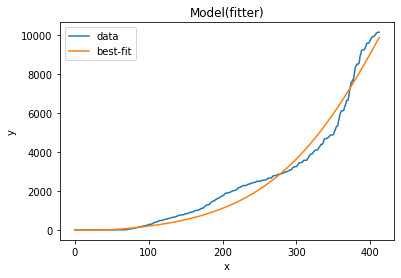

Prediction for Alabama
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


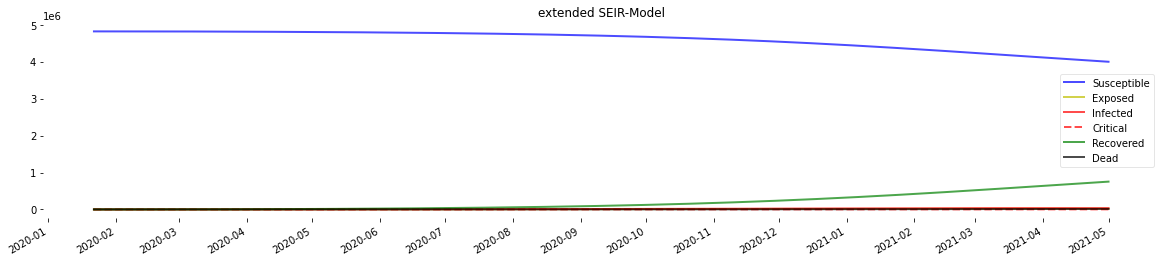

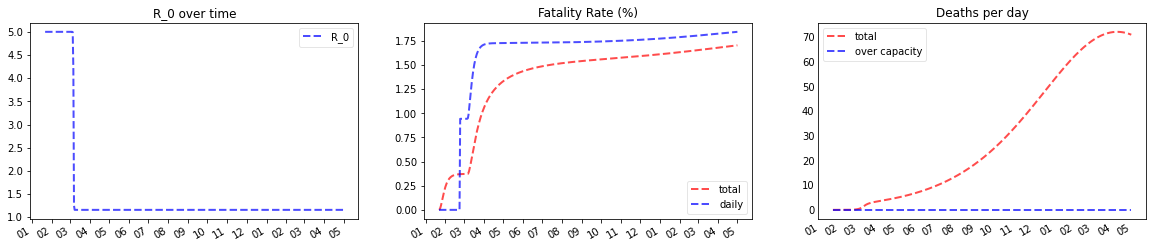

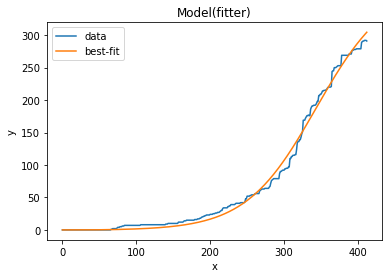

Prediction for Alaska
percentage going to ICU: 2.3907005243398514; percentage dying in ICU: 7.350462263640965


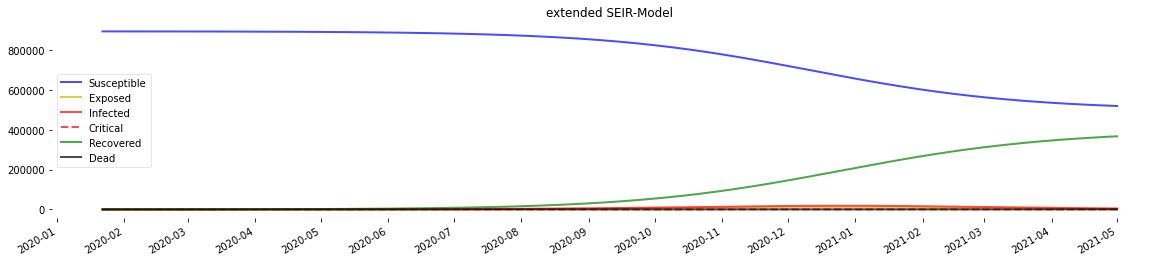

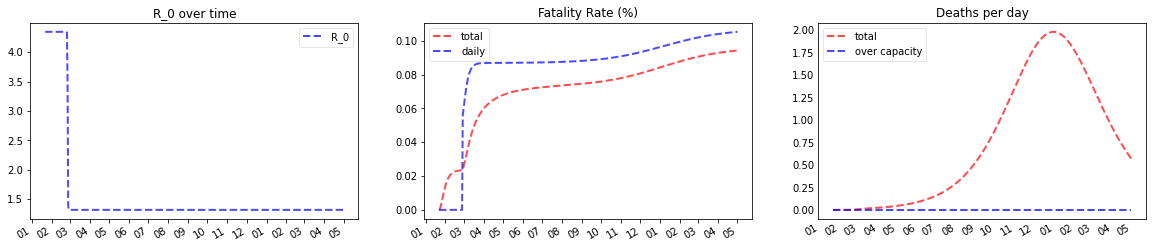

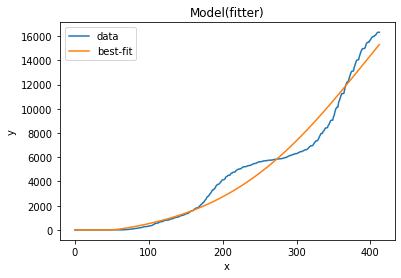

Prediction for Arizona
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


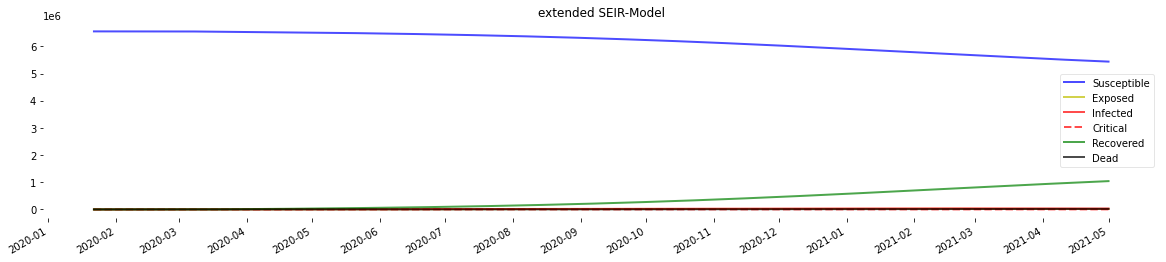

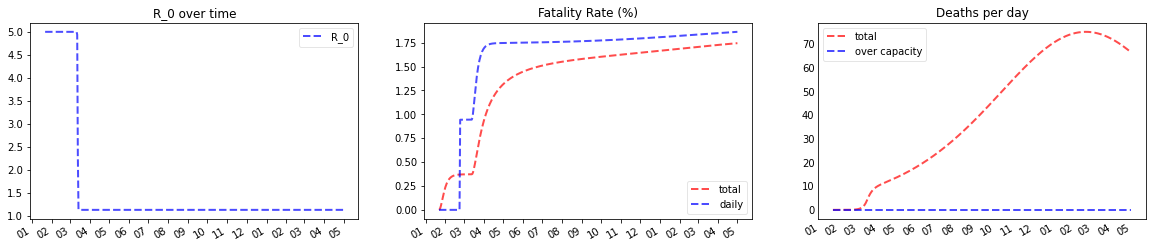

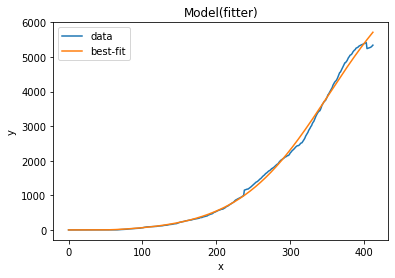

Prediction for Arkansas
percentage going to ICU: 7.749948618998929; percentage dying in ICU: 16.736503348320163


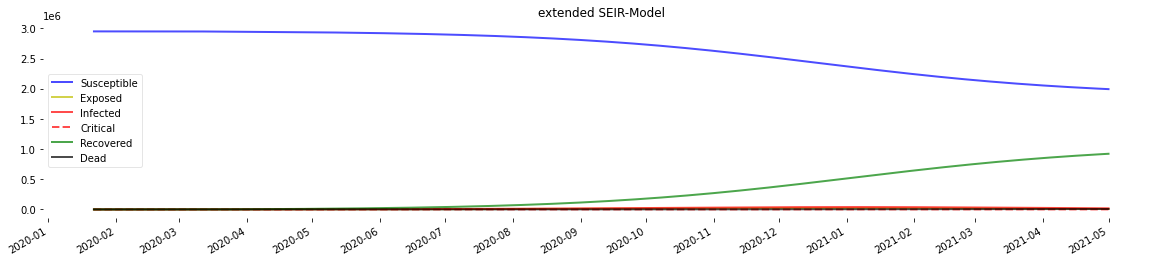

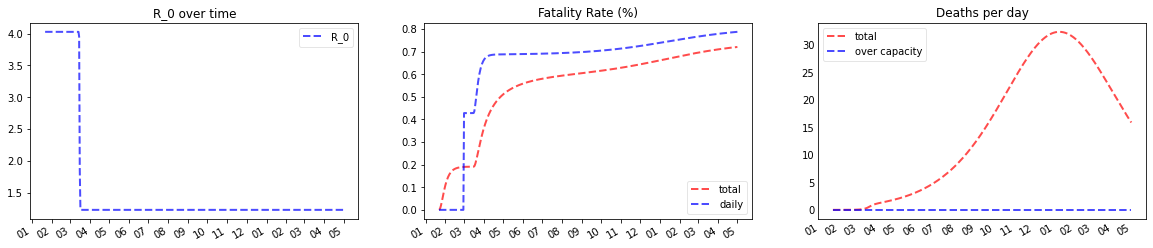

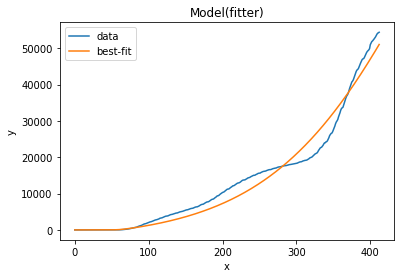

Prediction for California
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


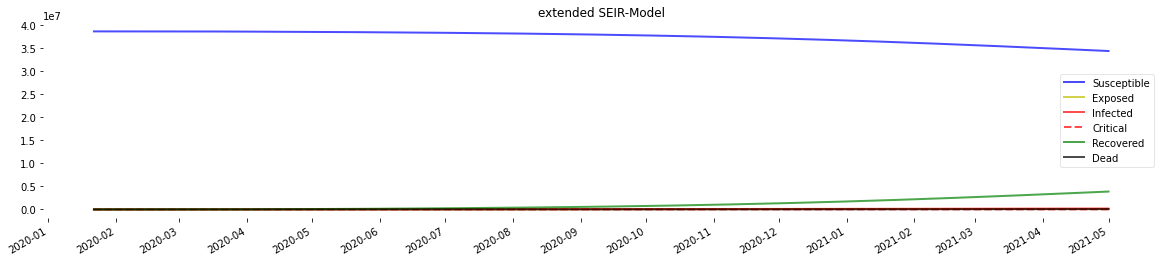

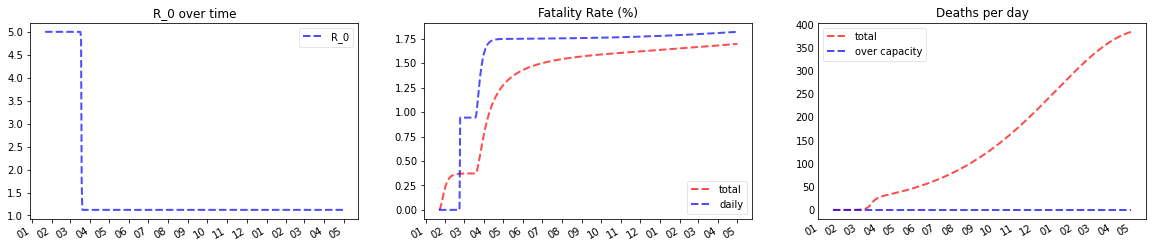

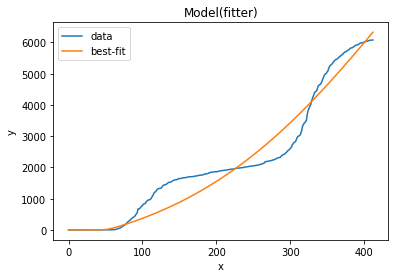

Prediction for Colorado
percentage going to ICU: 9.9999904485246; percentage dying in ICU: 29.999992207227837


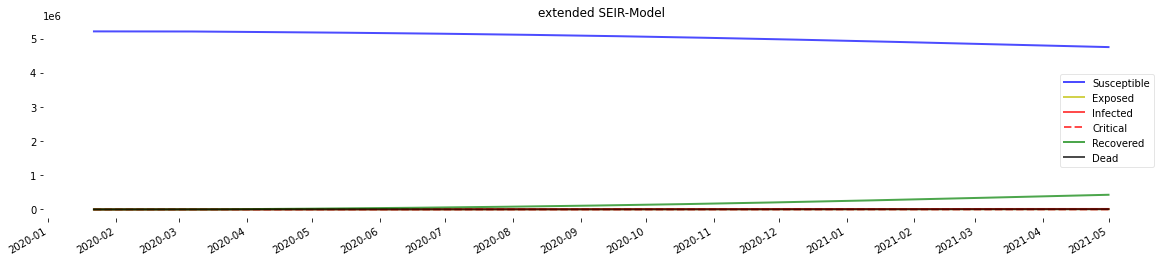

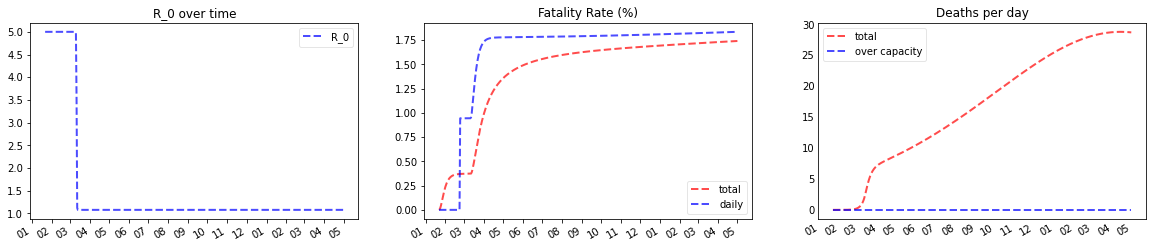

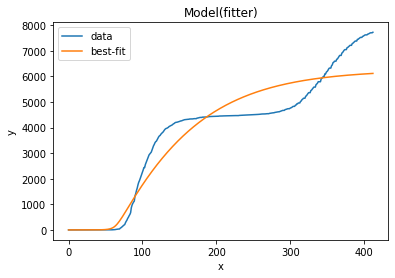

Prediction for Connecticut
percentage going to ICU: 9.999998584786987; percentage dying in ICU: 29.9999580471832


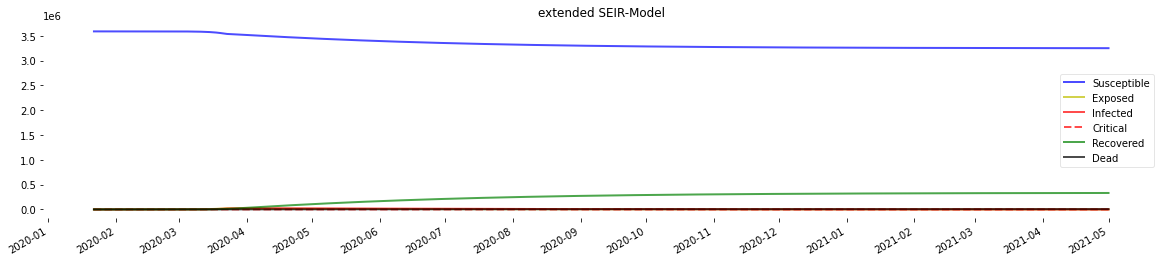

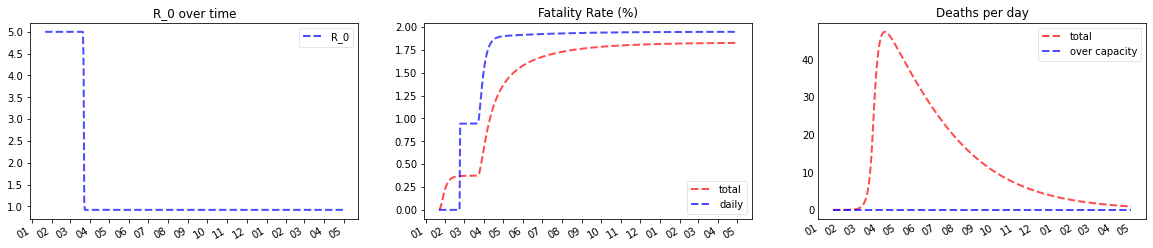

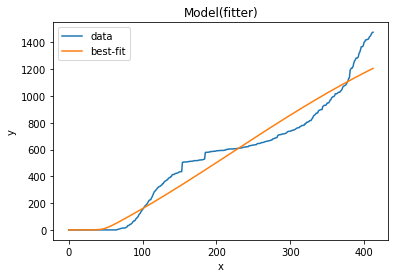

Prediction for Delaware
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


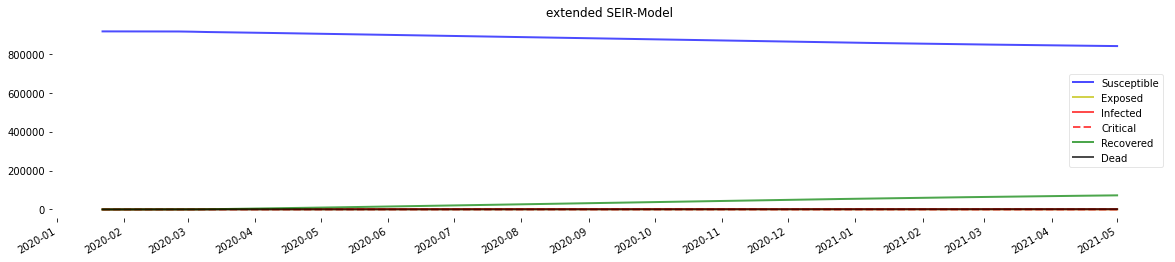

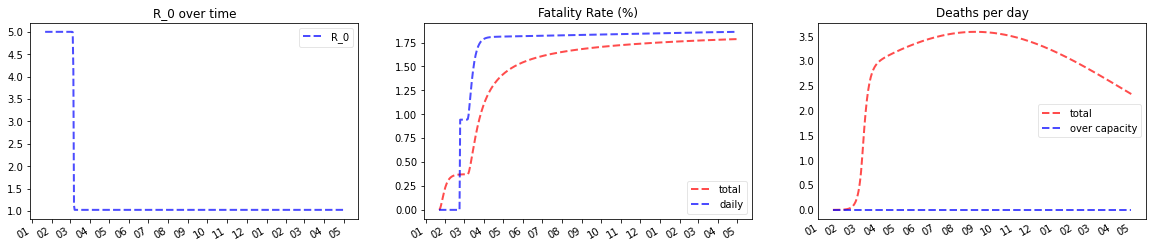

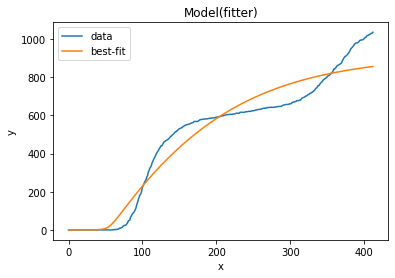

Prediction for District of Columbia
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


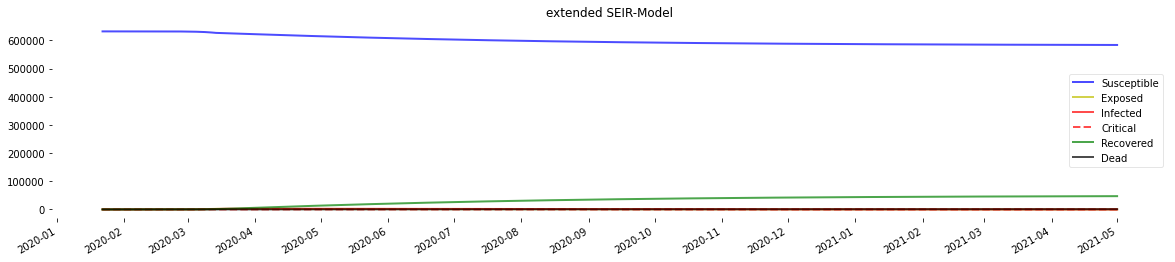

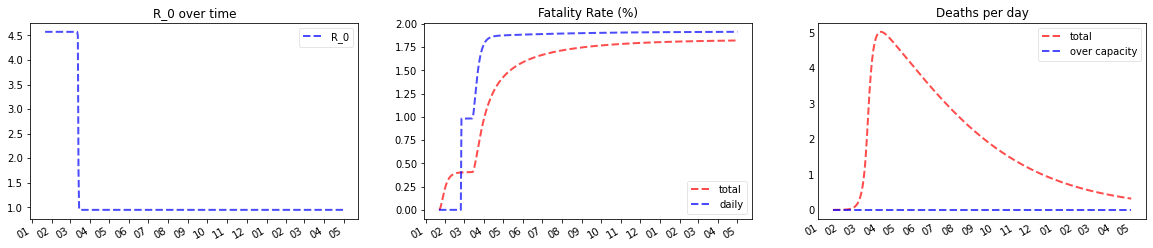

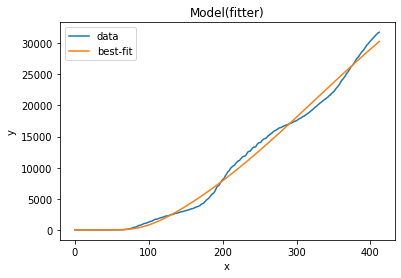

Prediction for Florida
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


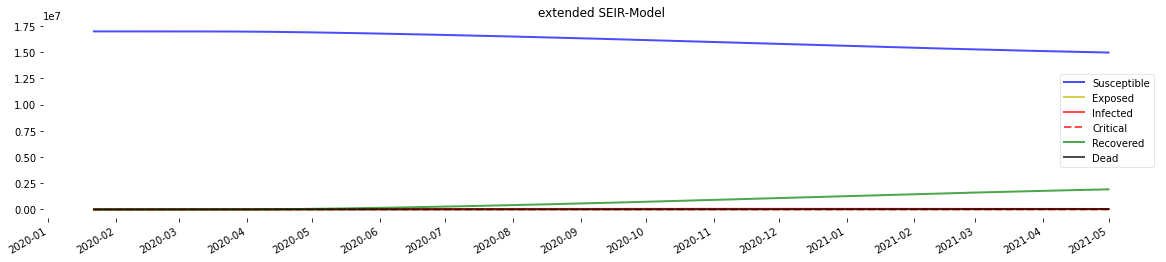

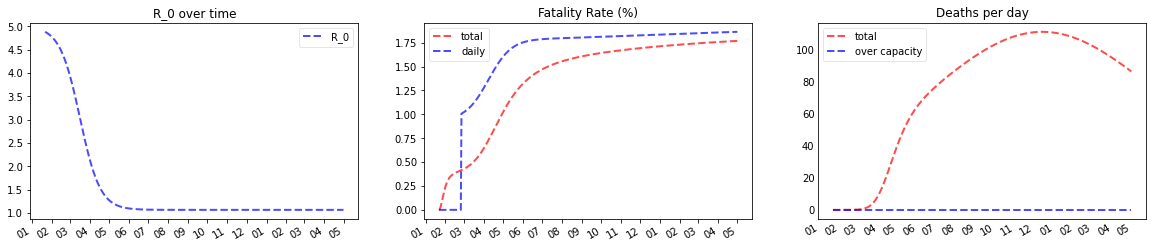

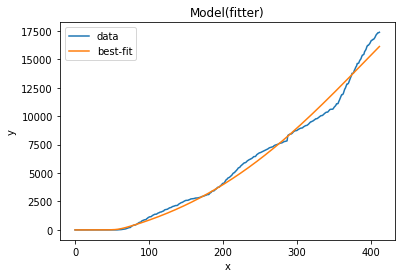

Prediction for Georgia
percentage going to ICU: 9.99999999999979; percentage dying in ICU: 29.999999999953776


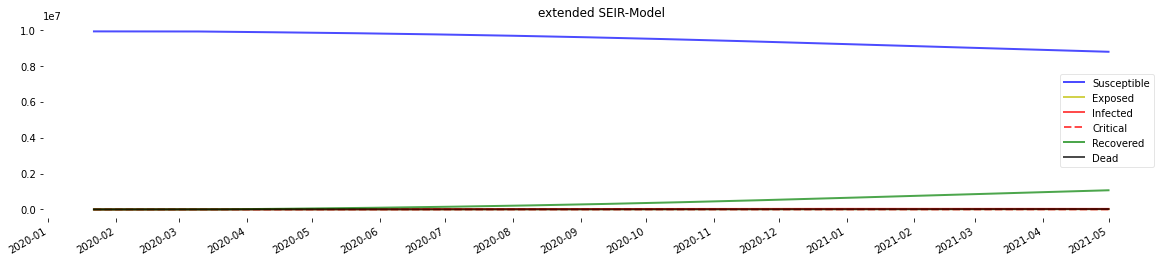

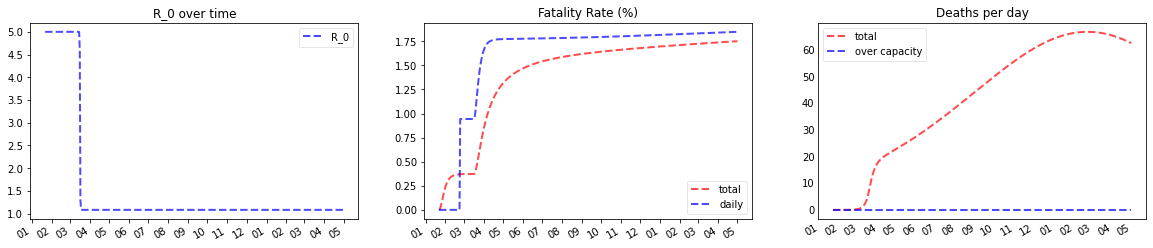

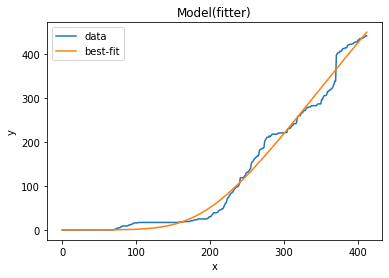

Prediction for Hawaii
percentage going to ICU: 6.08384019659421; percentage dying in ICU: 22.212278448967233


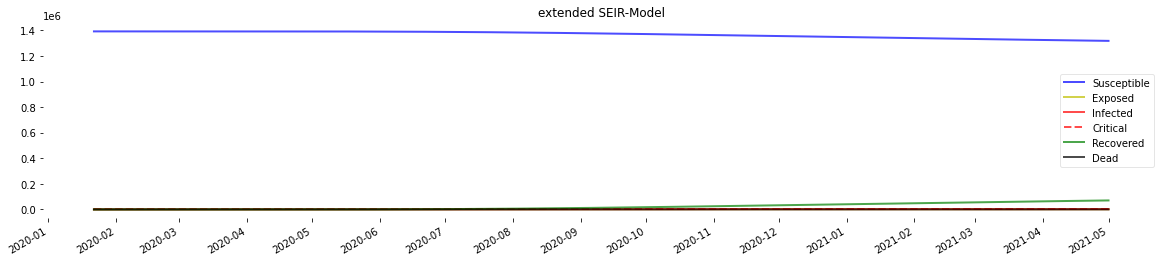

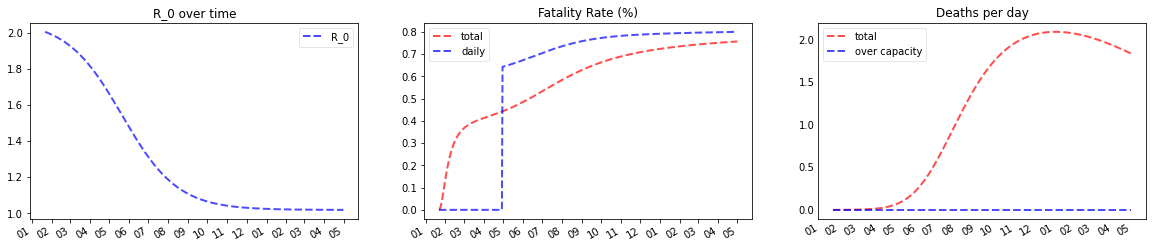

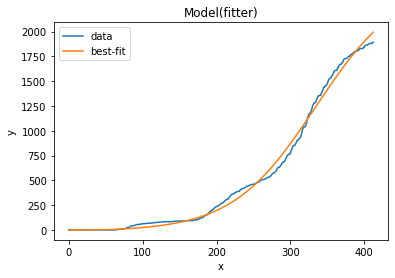

Prediction for Idaho
percentage going to ICU: 9.999999580165985; percentage dying in ICU: 7.335136122712115


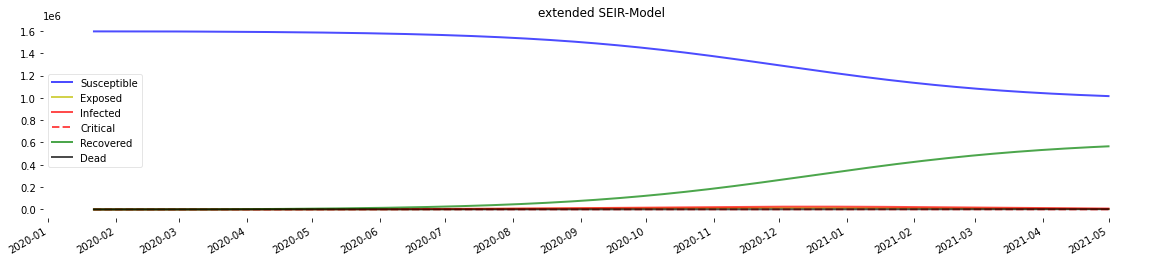

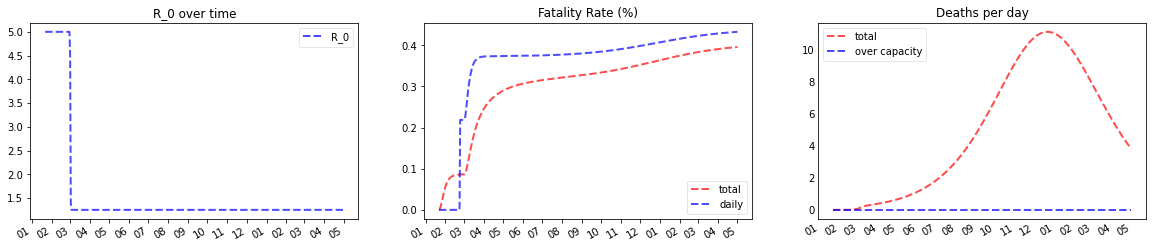

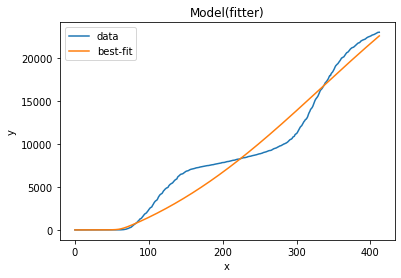

Prediction for Illinois
percentage going to ICU: 9.999999999999963; percentage dying in ICU: 29.99999999950139


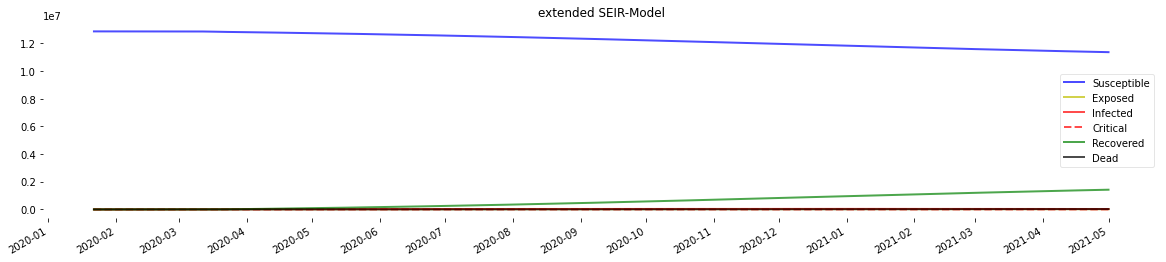

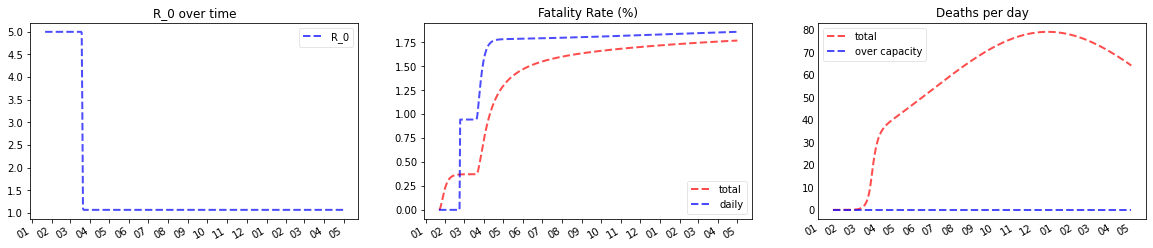

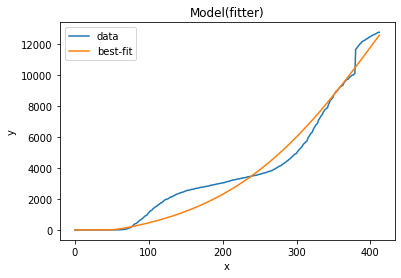

Prediction for Indiana
percentage going to ICU: 9.999999999479622; percentage dying in ICU: 29.999999996798827


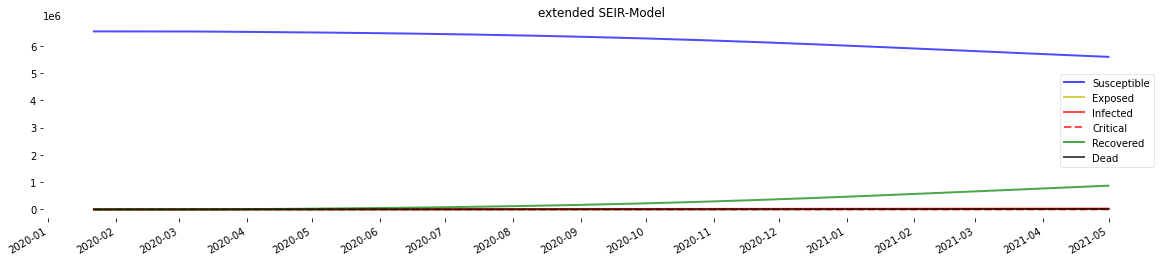

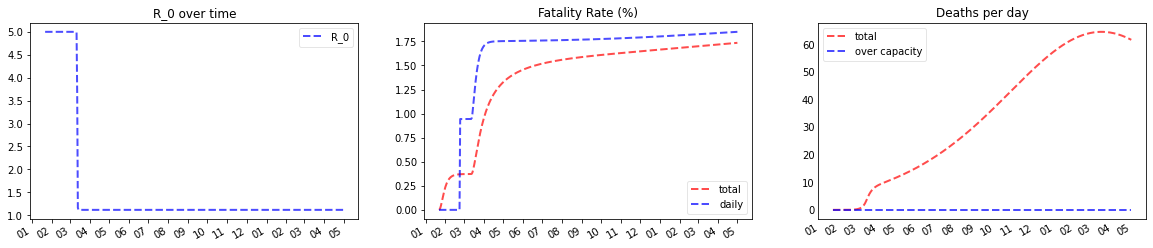

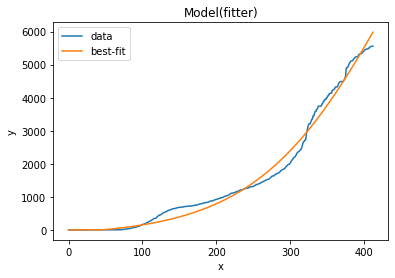

Prediction for Iowa
percentage going to ICU: 9.999999999999496; percentage dying in ICU: 29.999999999997378


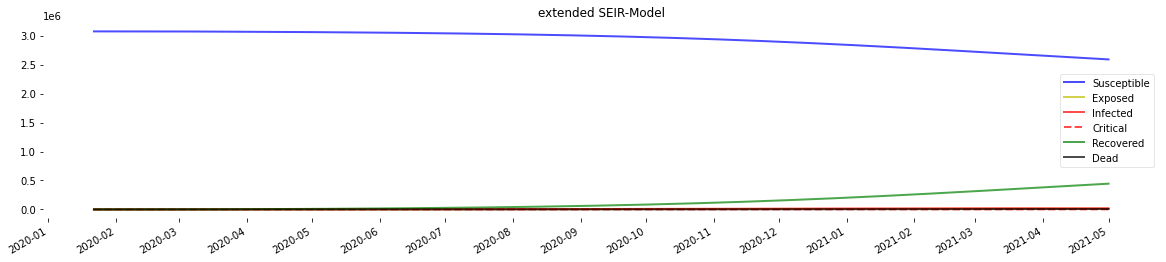

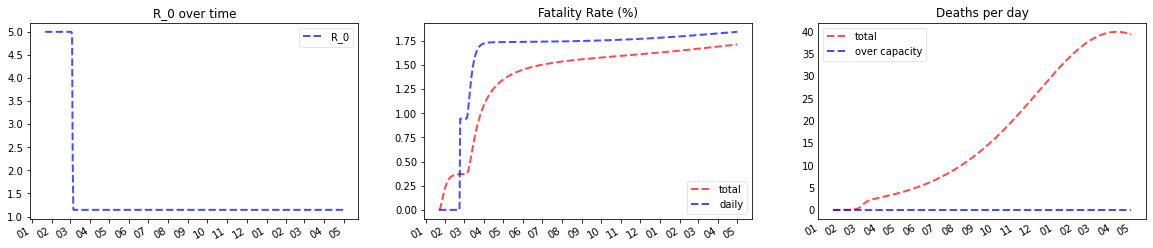

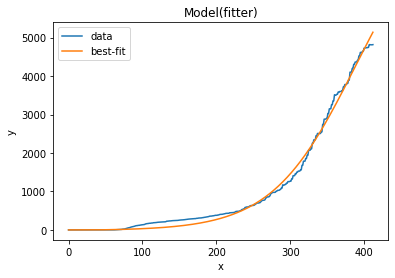

Prediction for Kansas
percentage going to ICU: 9.89377176602393; percentage dying in ICU: 13.685244874190378


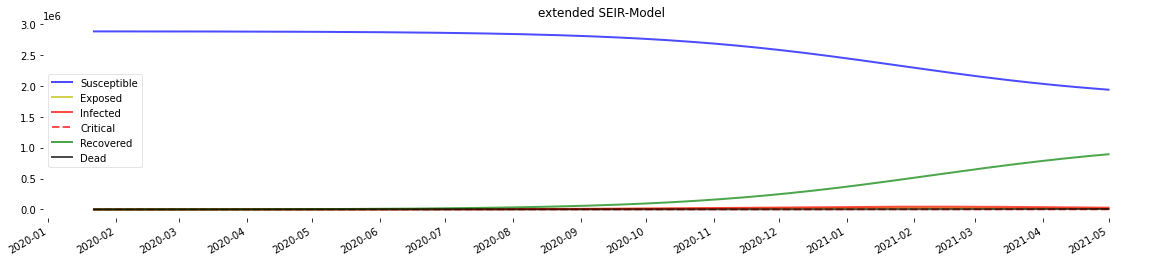

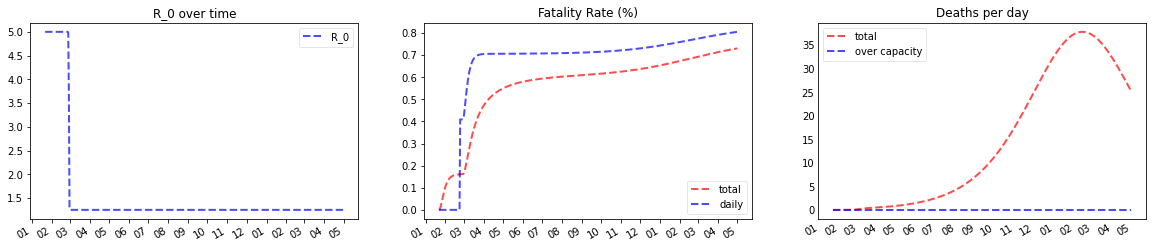

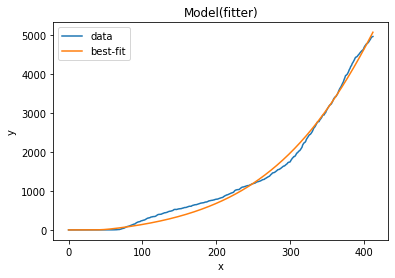

Prediction for Kentucky
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


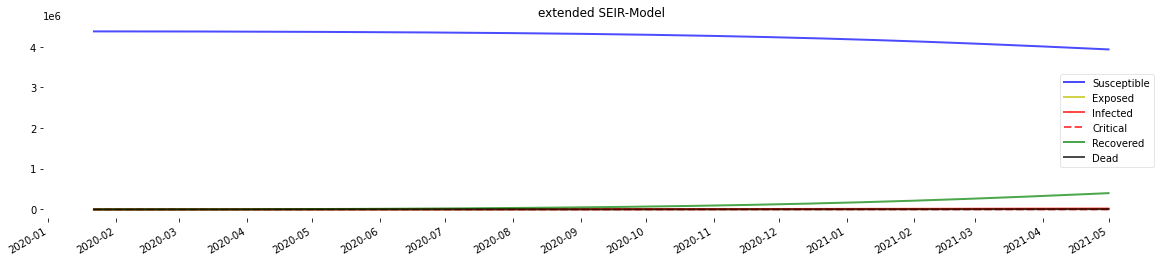

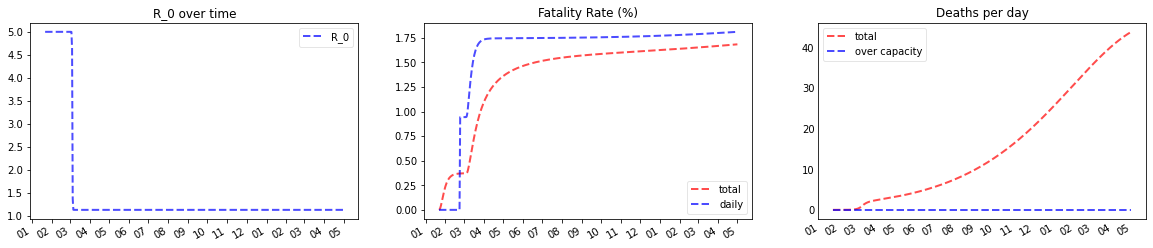

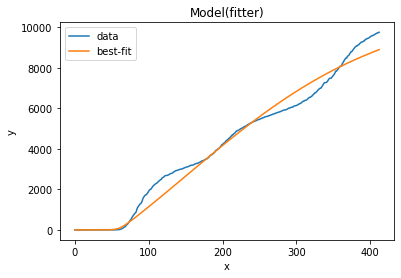

Prediction for Louisiana
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999936


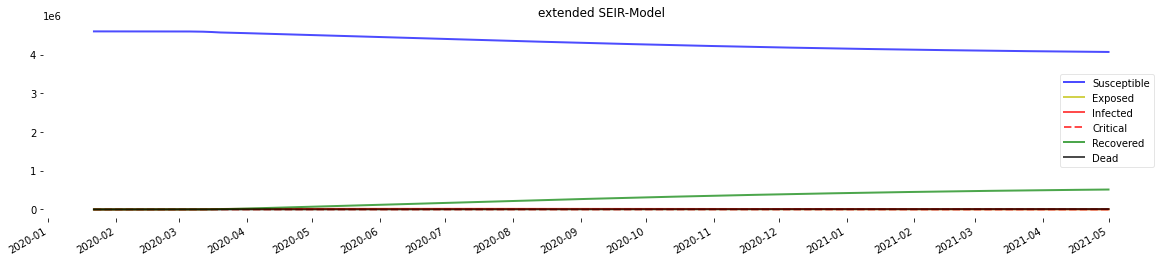

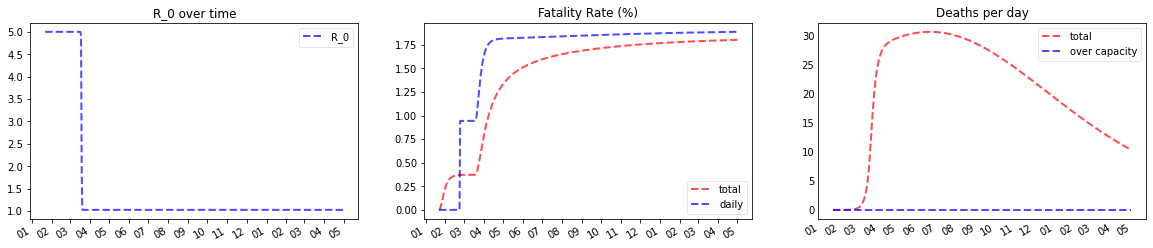

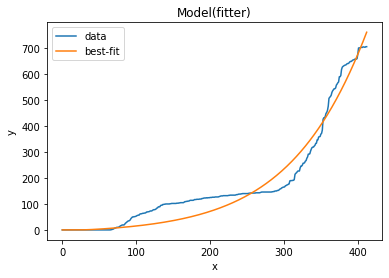

Prediction for Maine
percentage going to ICU: 9.99999999992805; percentage dying in ICU: 29.999999999135298


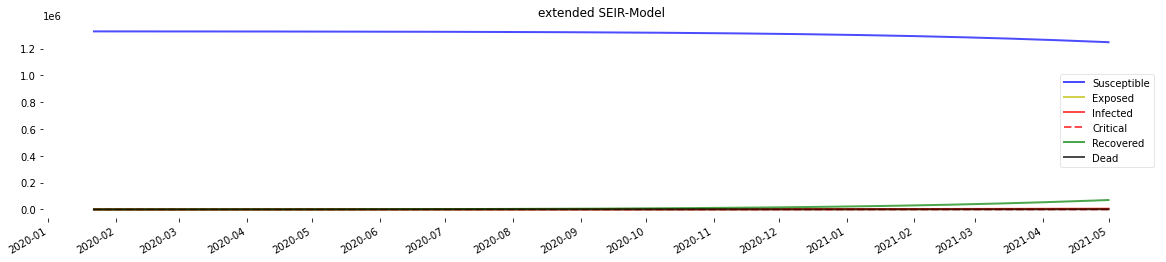

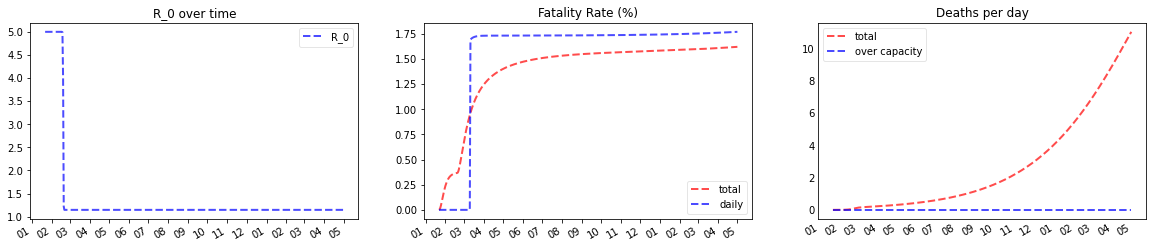

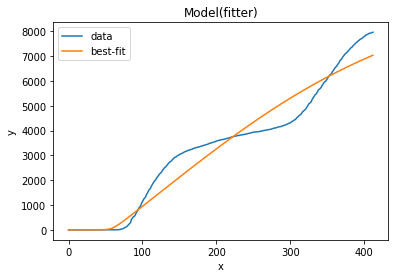

Prediction for Maryland
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


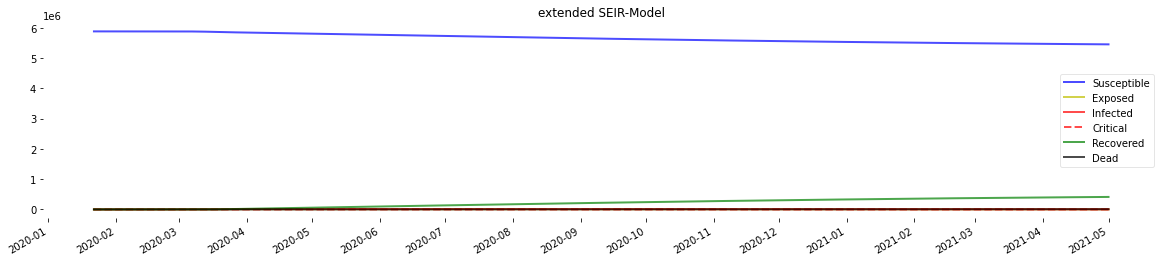

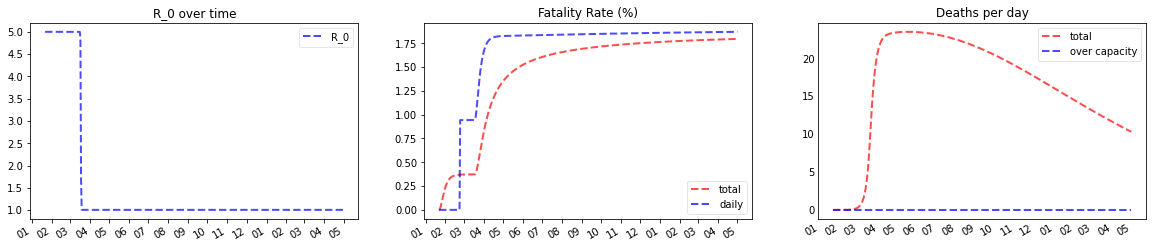

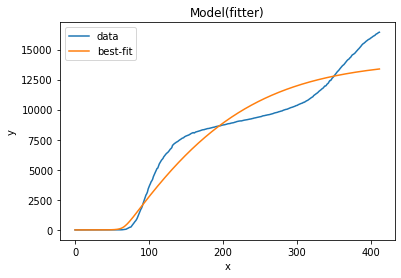

Prediction for Massachusetts
percentage going to ICU: 9.999997724434035; percentage dying in ICU: 29.999983660718065


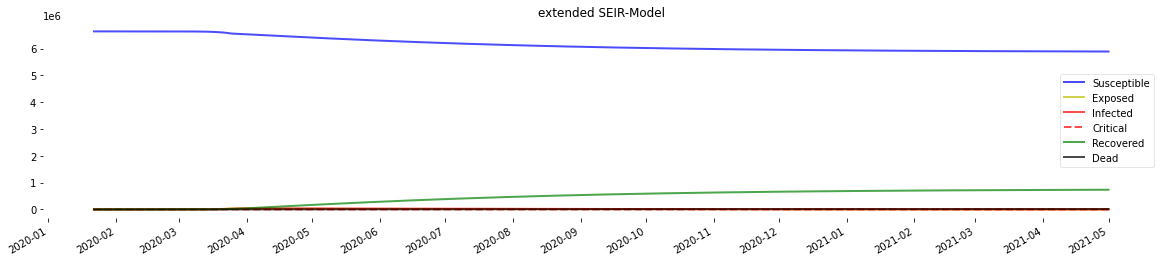

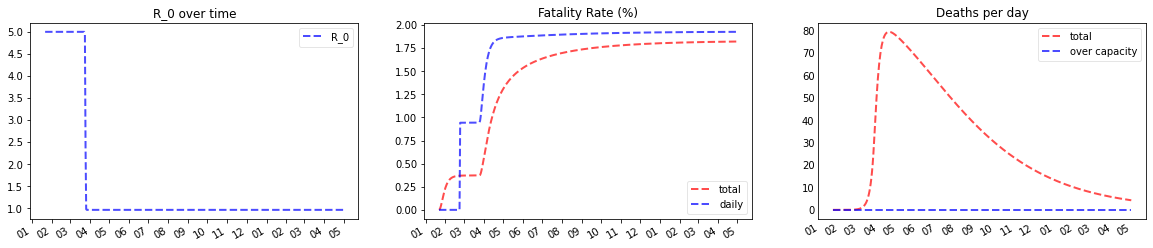

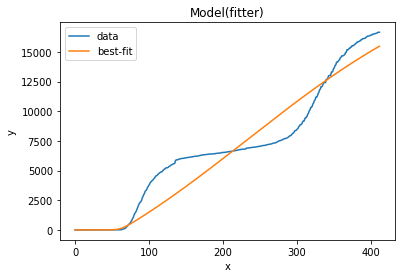

Prediction for Michigan
percentage going to ICU: 9.999994278923147; percentage dying in ICU: 29.999995241259008


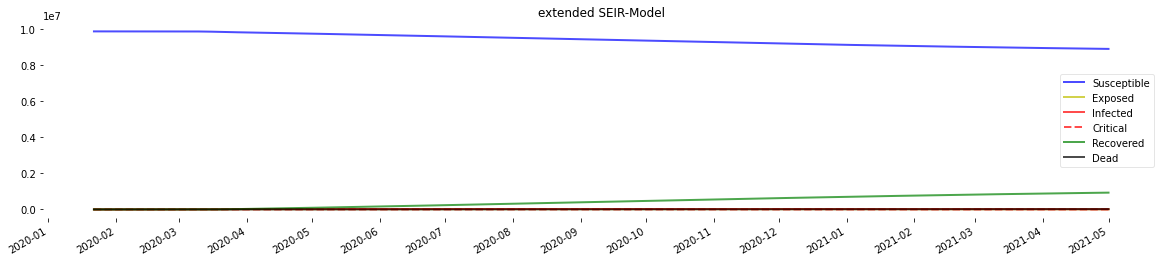

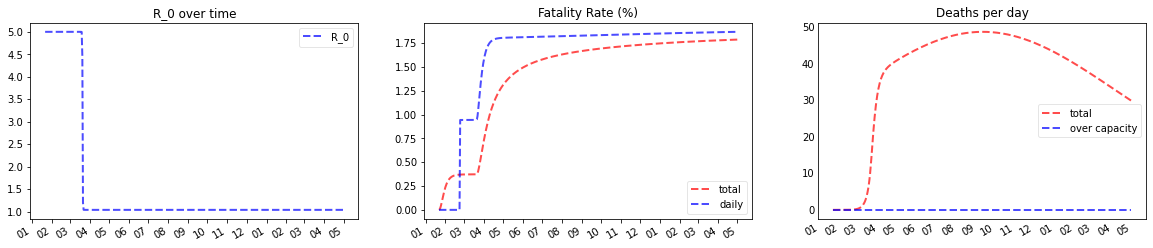

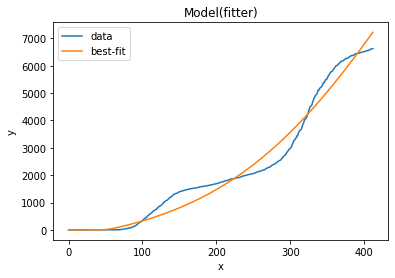

Prediction for Minnesota
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


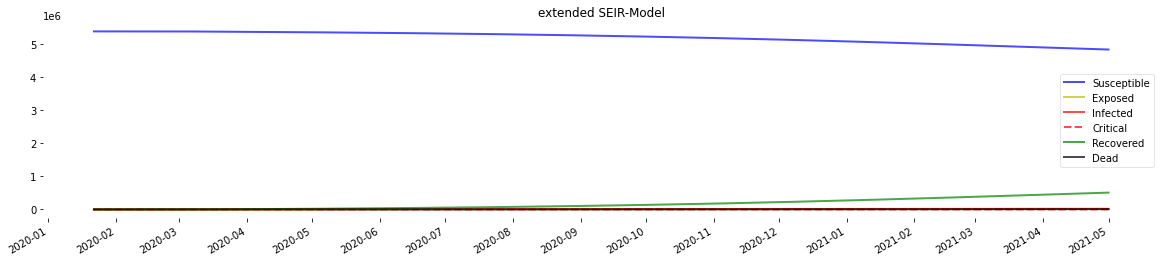

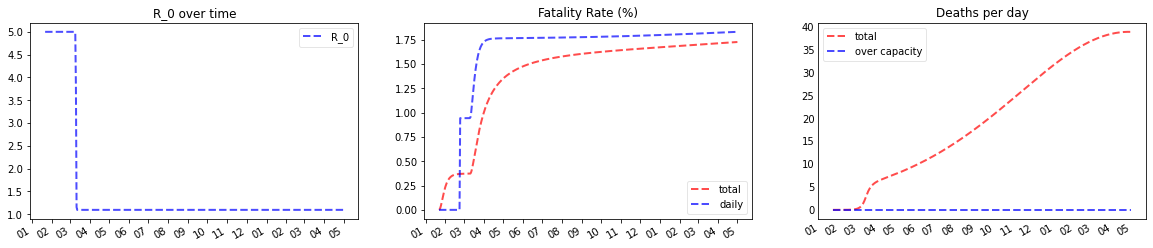

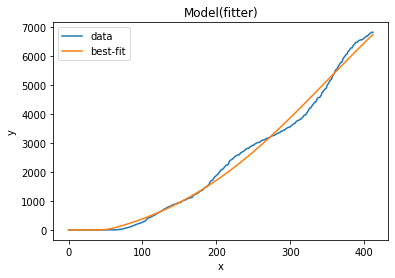

Prediction for Mississippi
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


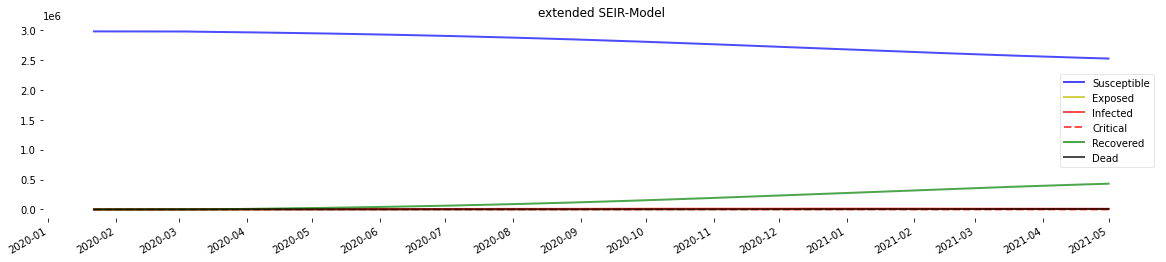

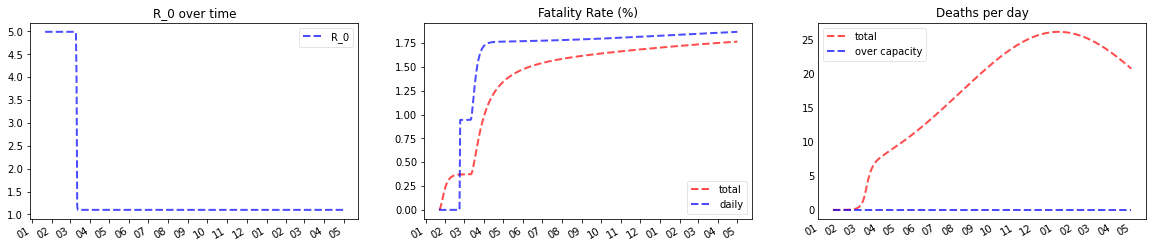

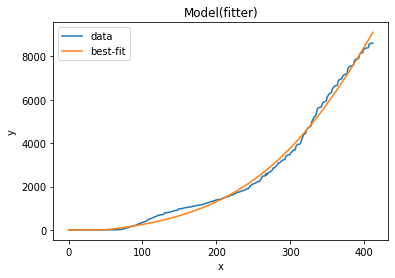

Prediction for Missouri
percentage going to ICU: 9.999999998575912; percentage dying in ICU: 27.15733767998912


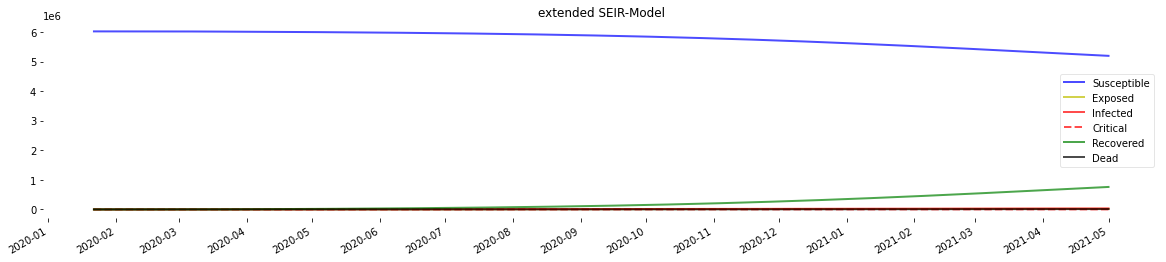

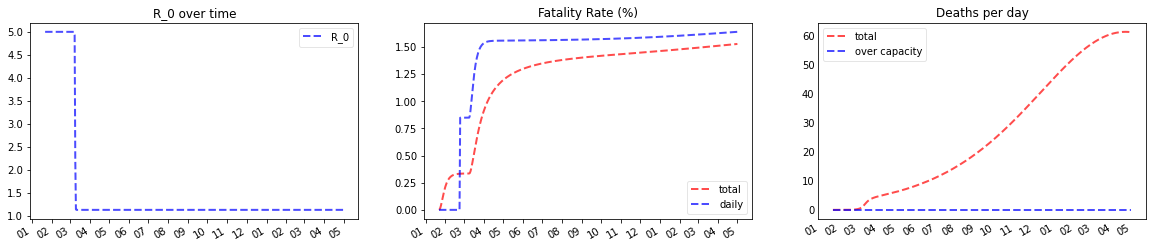

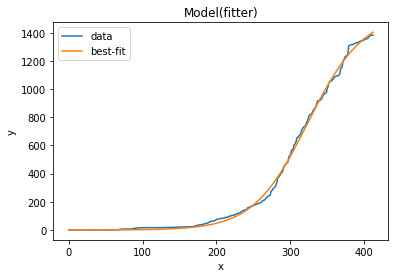

Prediction for Montana
percentage going to ICU: 4.366032375774744; percentage dying in ICU: 11.817492561929967


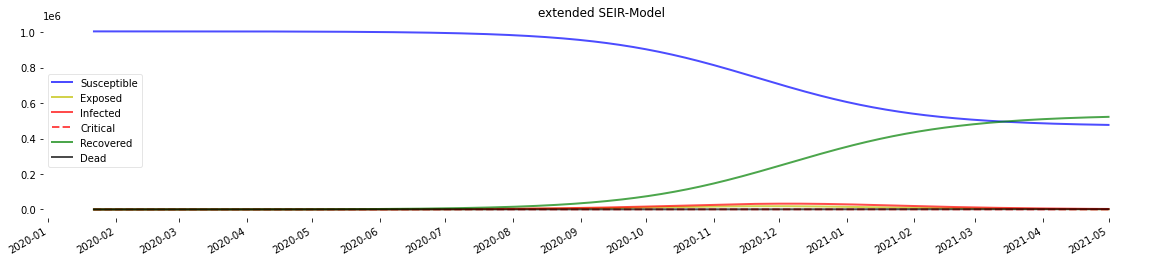

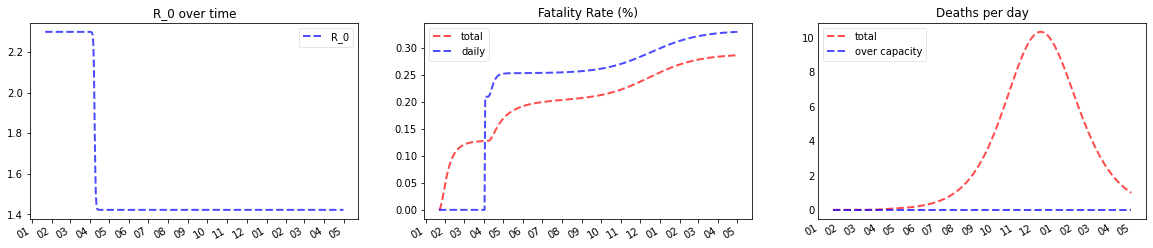

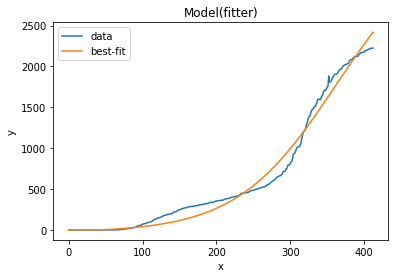

Prediction for Nebraska
percentage going to ICU: 9.999960465777628; percentage dying in ICU: 10.335586679546712


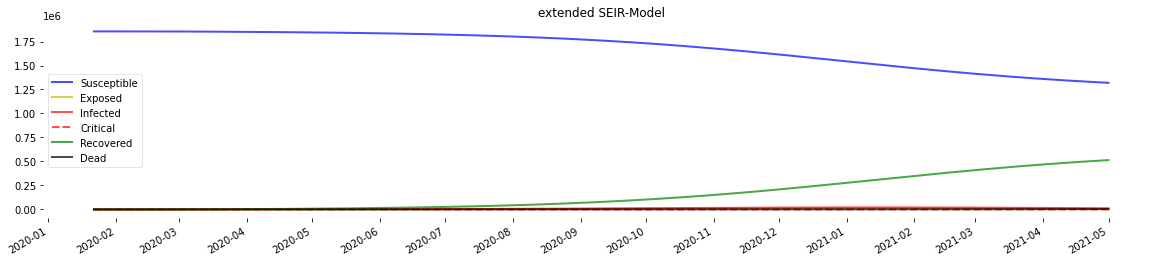

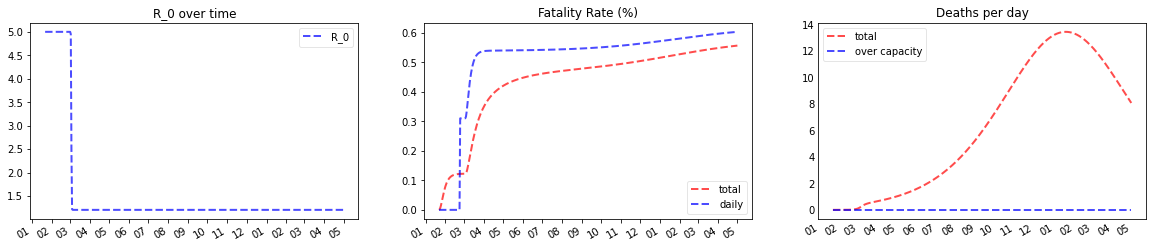

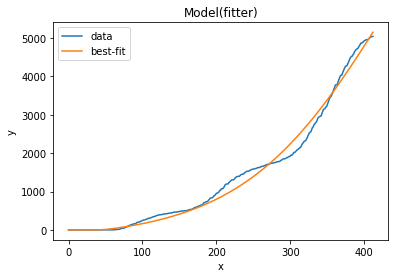

Prediction for Nevada
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


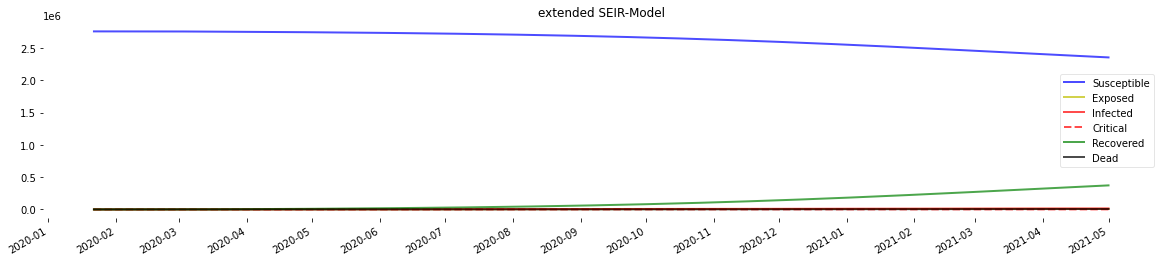

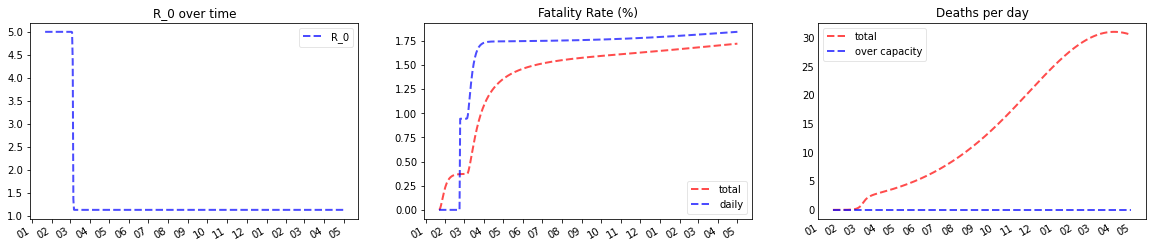

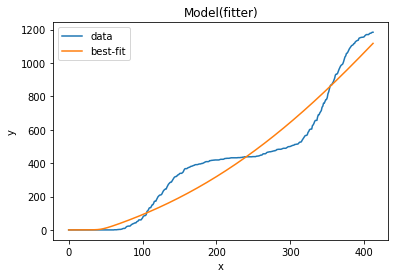

Prediction for New Hampshire
percentage going to ICU: 9.999999999999979; percentage dying in ICU: 29.99999999943081


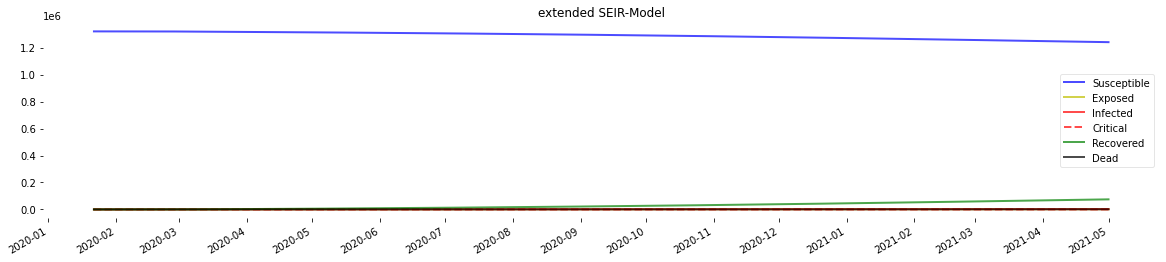

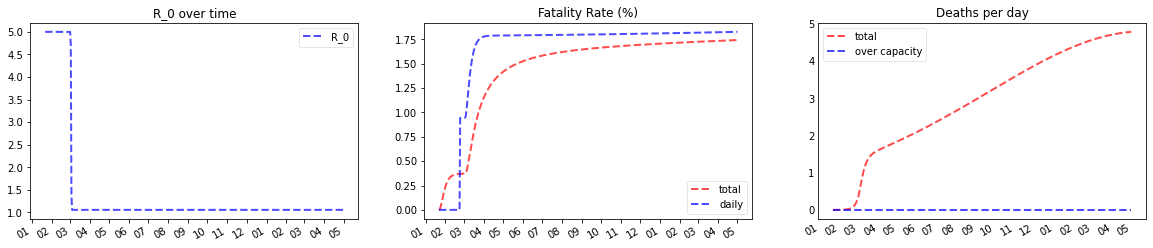

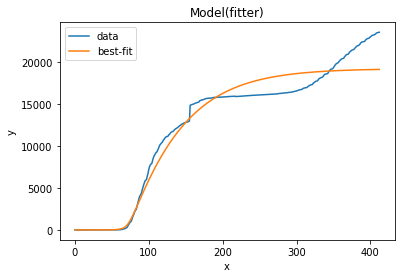

Prediction for New Jersey
percentage going to ICU: 9.999999194493176; percentage dying in ICU: 29.999922989071422


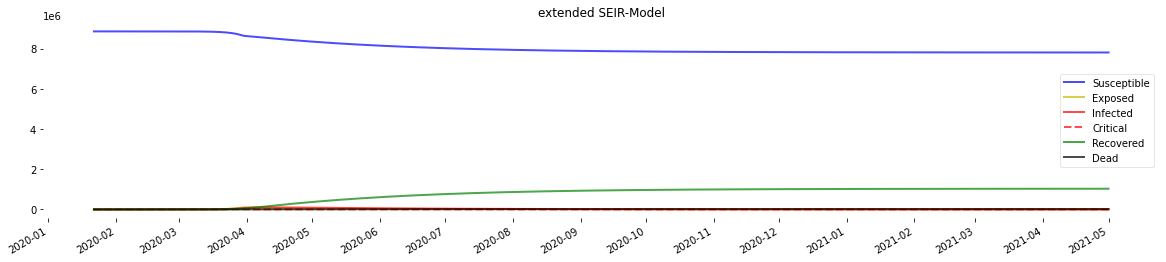

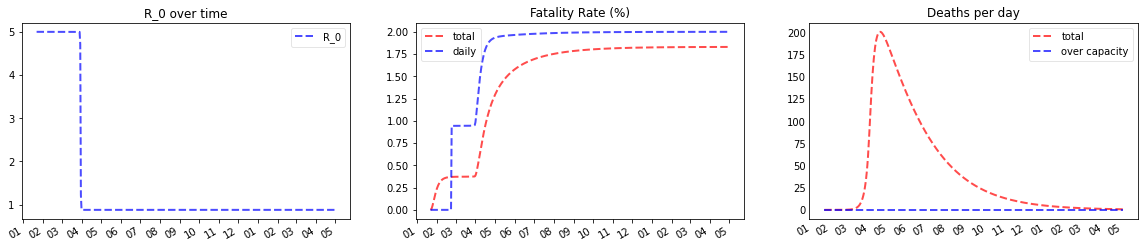

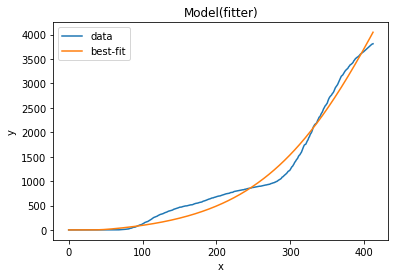

Prediction for New Mexico
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999982


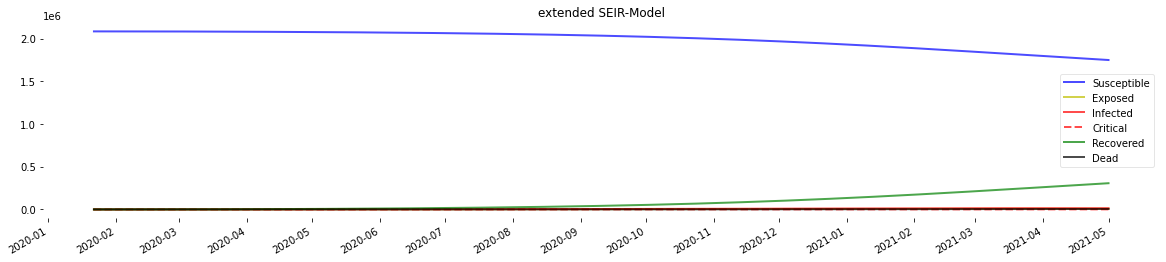

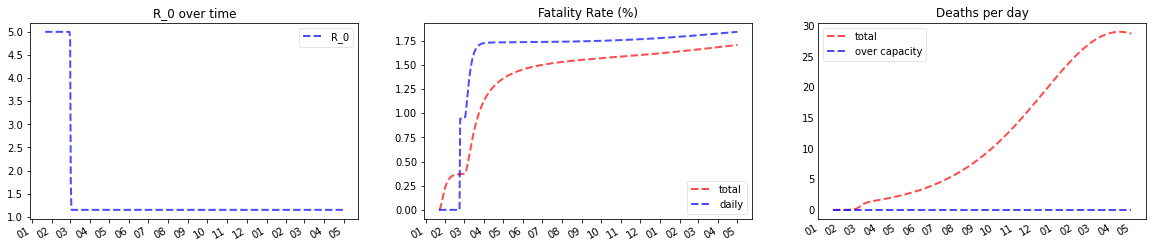

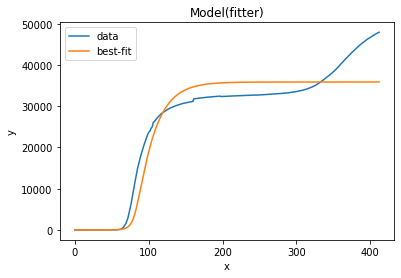

Prediction for New York
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


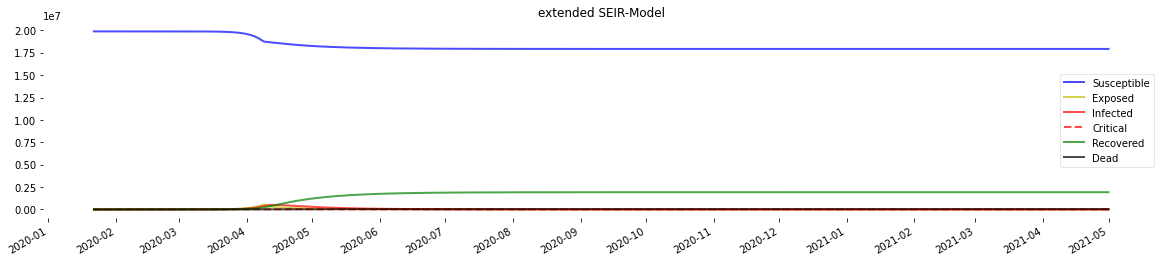

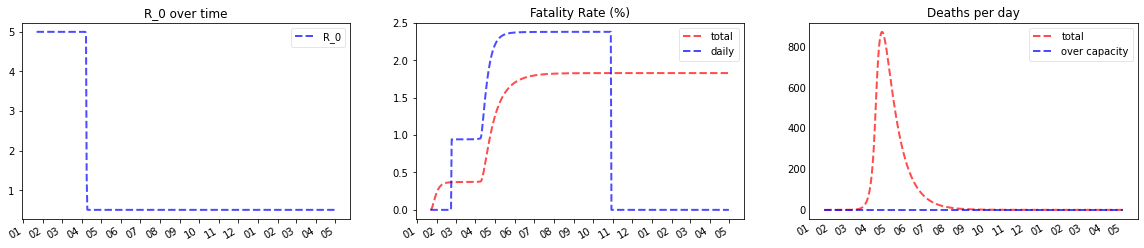

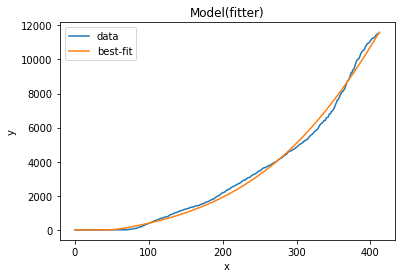

Prediction for North Carolina
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


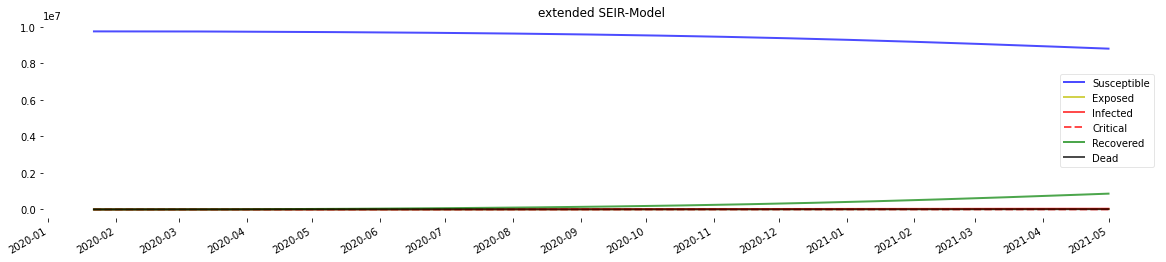

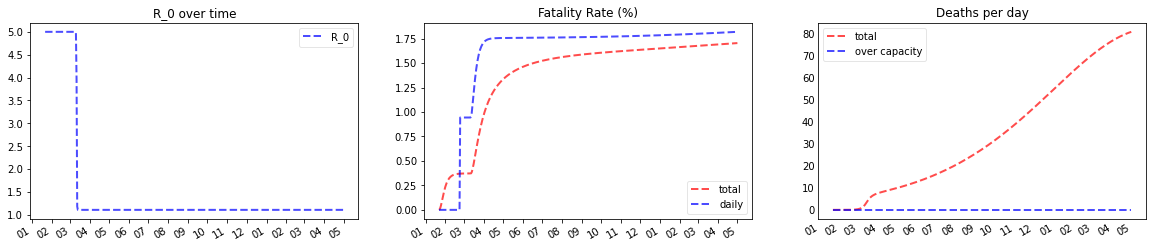

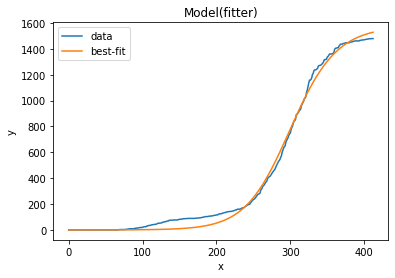

Prediction for North Dakota
percentage going to ICU: 5.739786334587911; percentage dying in ICU: 11.585203270210206


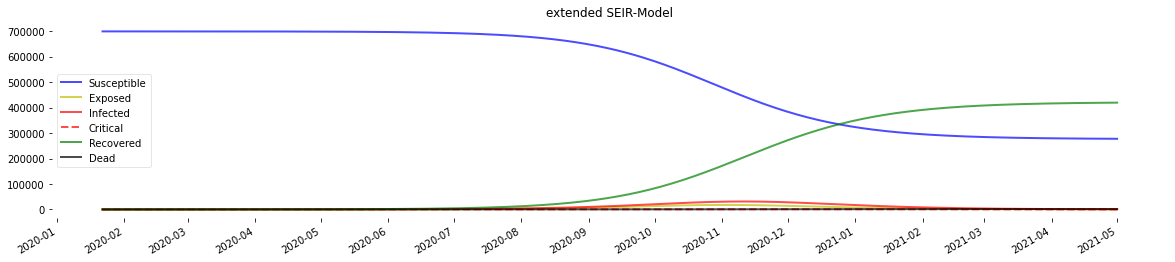

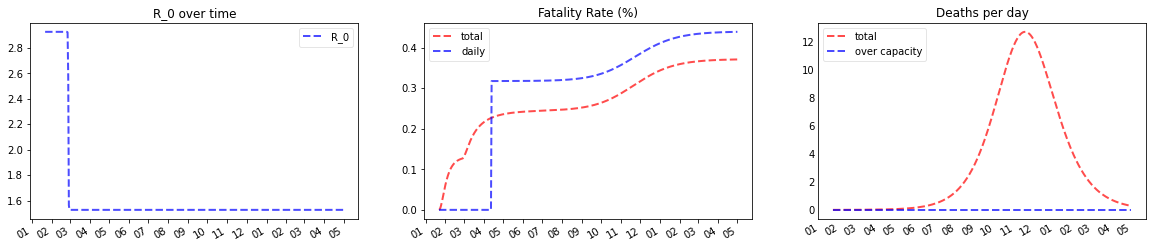

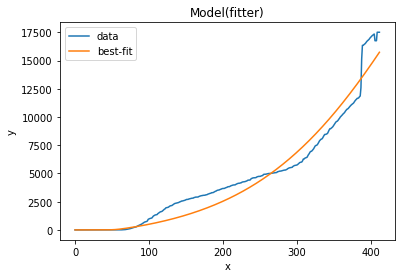

Prediction for Ohio
percentage going to ICU: 9.999999995503838; percentage dying in ICU: 29.999999992328675


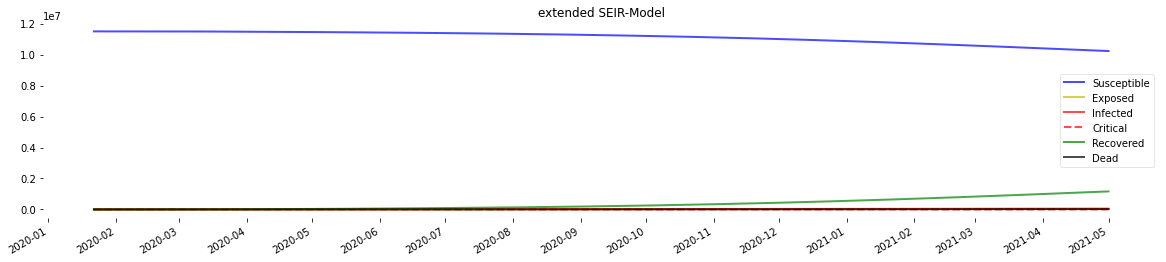

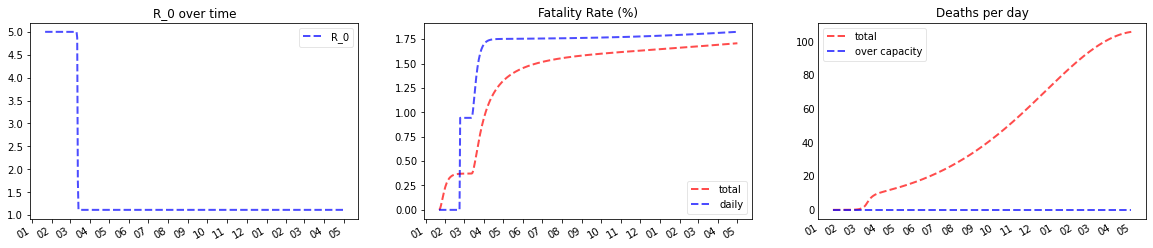

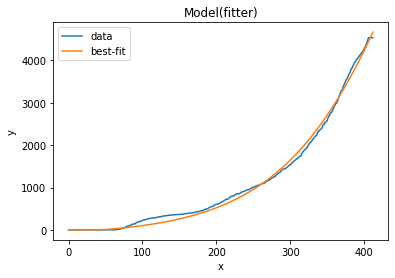

Prediction for Oklahoma
percentage going to ICU: 10.0; percentage dying in ICU: 29.99999999999996


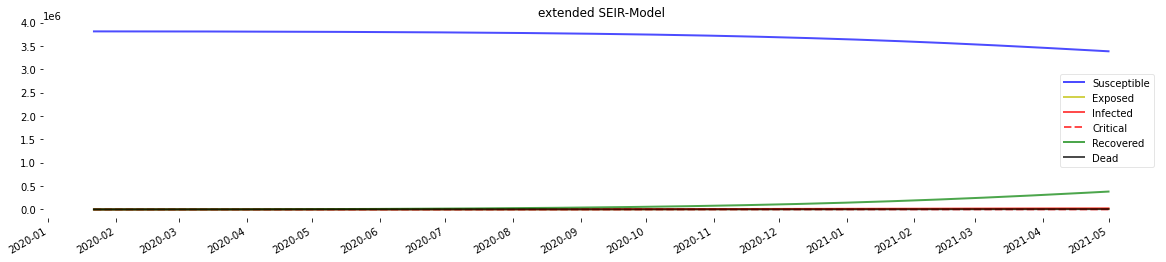

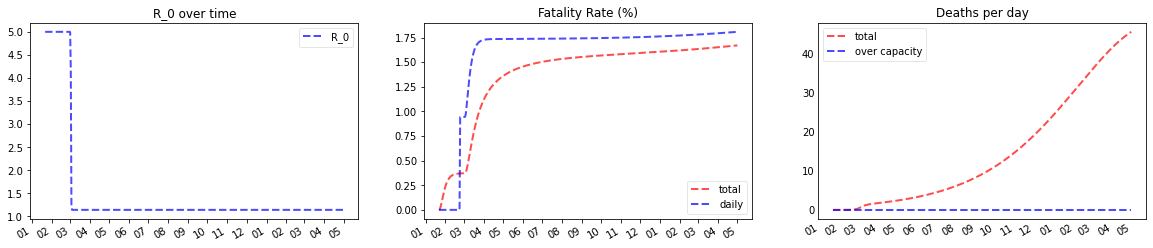

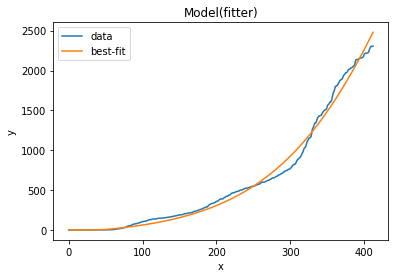

Prediction for Oregon
percentage going to ICU: 9.999995227078116; percentage dying in ICU: 15.648841279992837


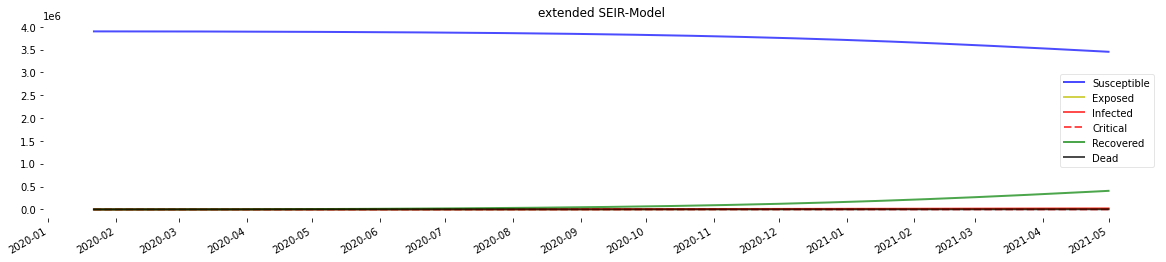

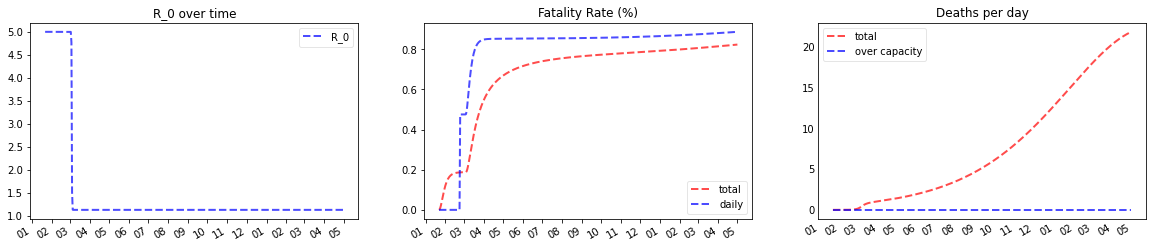

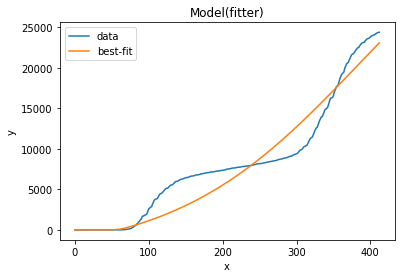

Prediction for Pennsylvania
percentage going to ICU: 9.999999999999973; percentage dying in ICU: 29.99999999999754


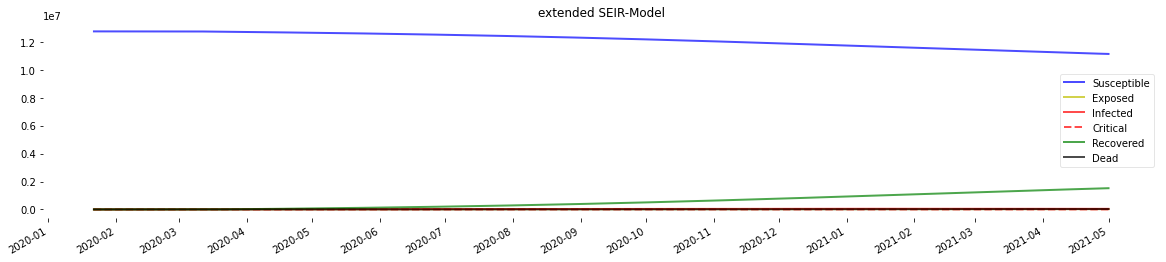

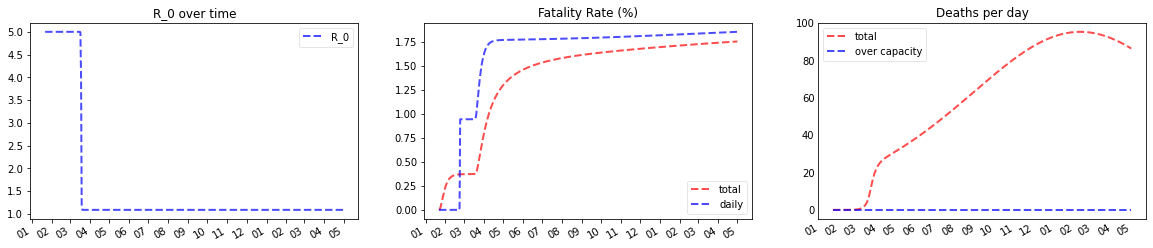

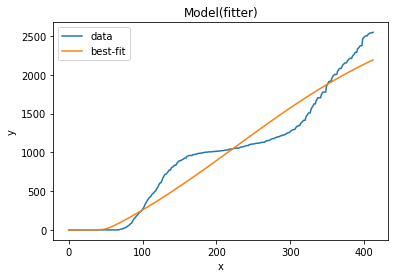

Prediction for Rhode Island
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999982


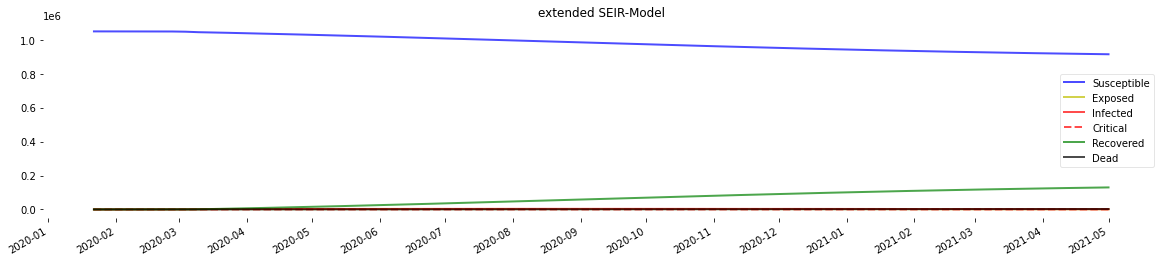

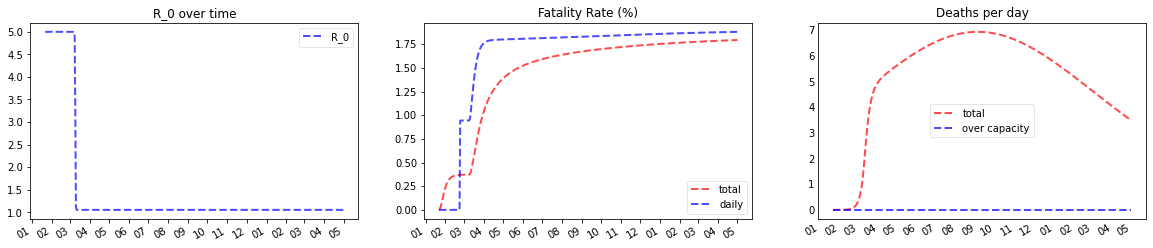

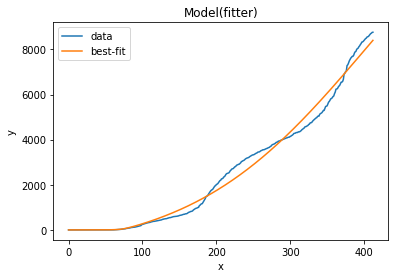

Prediction for South Carolina
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


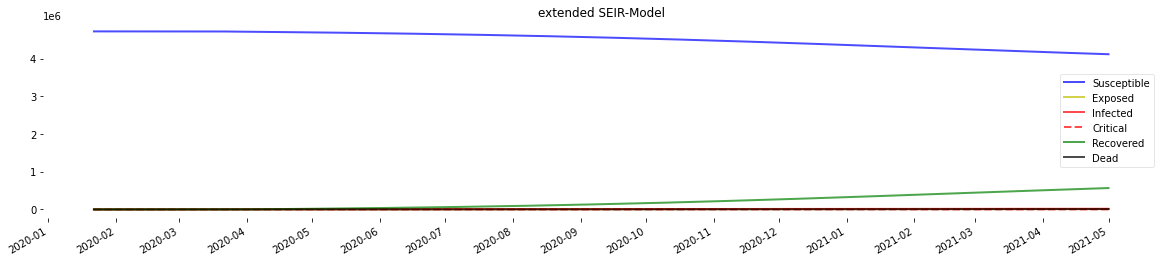

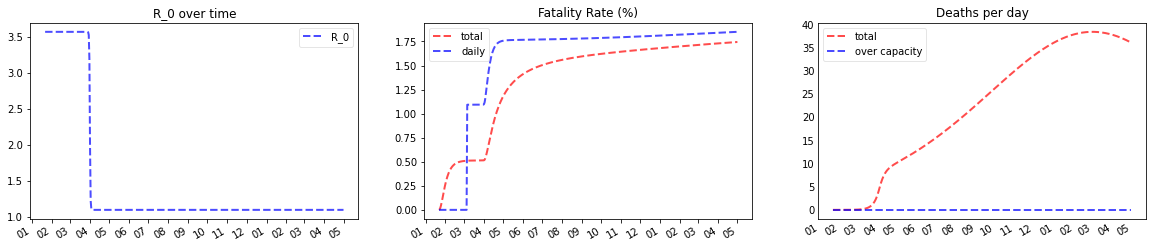

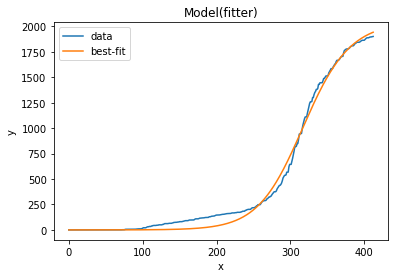

Prediction for South Dakota
percentage going to ICU: 6.836194040369695; percentage dying in ICU: 10.69766713717217


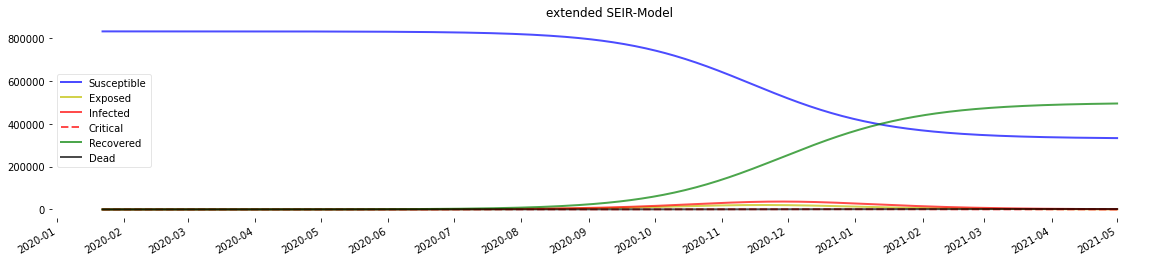

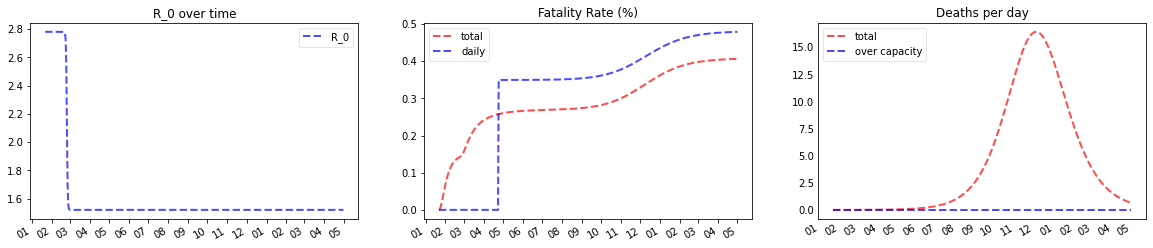

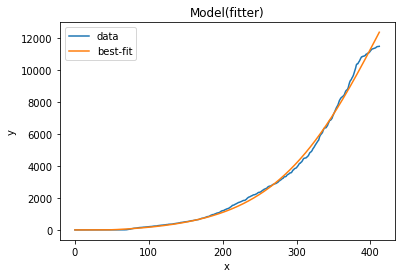

Prediction for Tennessee
percentage going to ICU: 9.999982793096681; percentage dying in ICU: 21.925636794704236


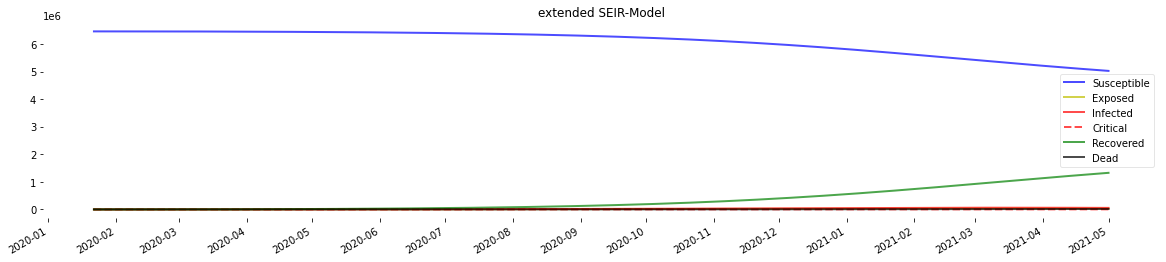

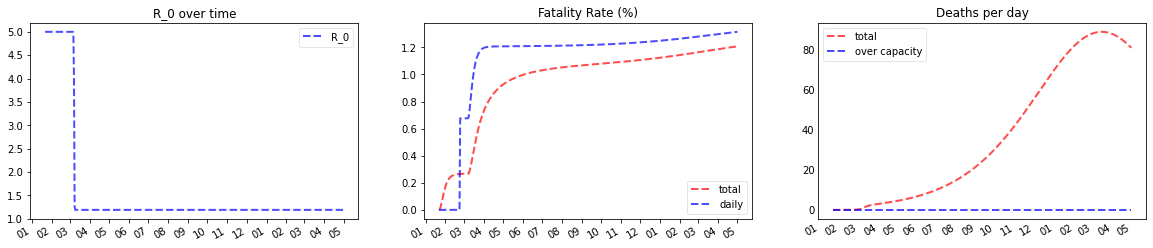

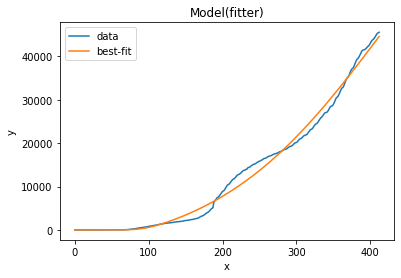

Prediction for Texas
percentage going to ICU: 10.0; percentage dying in ICU: 29.999999999999993


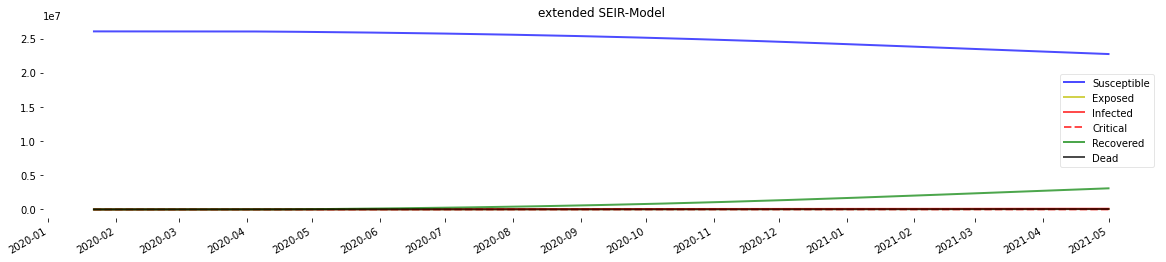

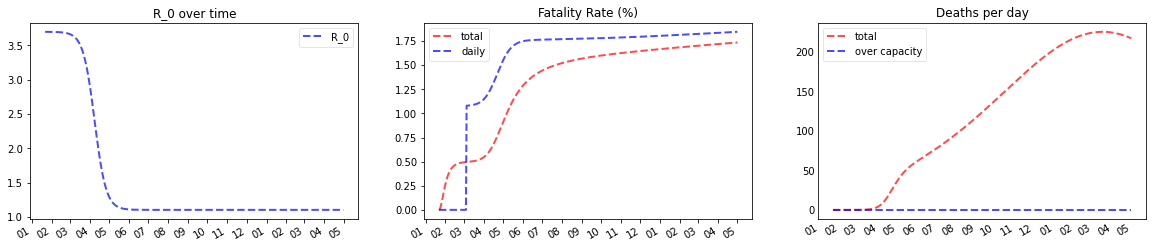

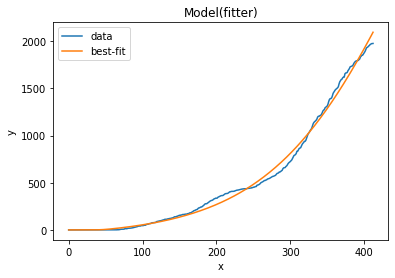

Prediction for Utah
percentage going to ICU: 9.107532043062628; percentage dying in ICU: 16.371356196040608


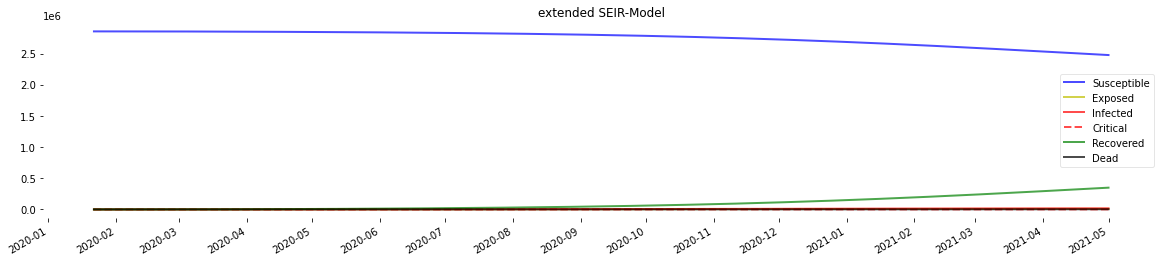

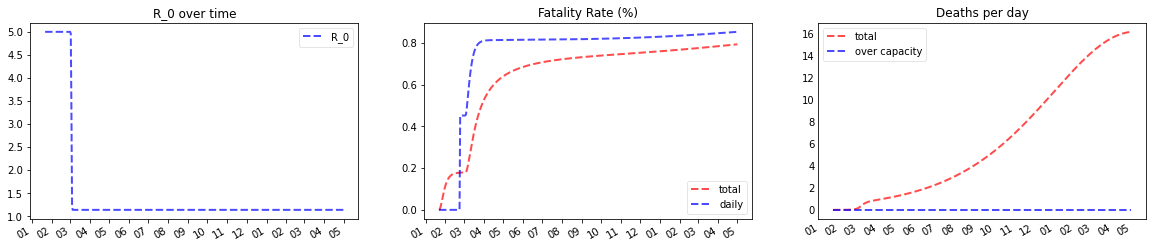

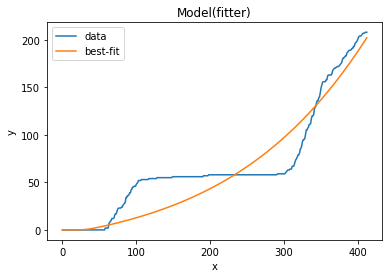

Prediction for Vermont
percentage going to ICU: 9.999999999389425; percentage dying in ICU: 29.999999987050437


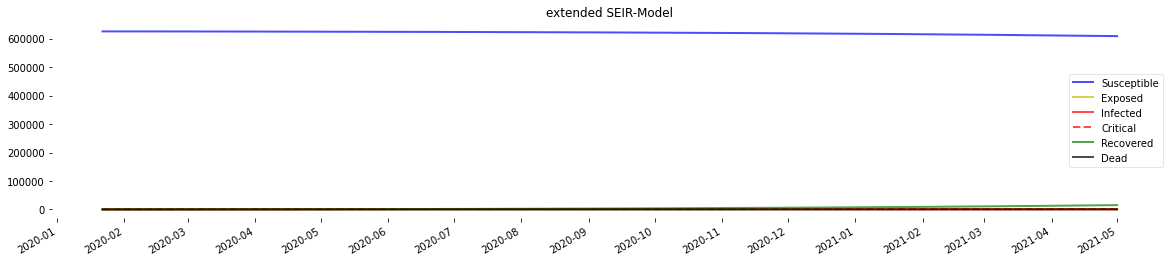

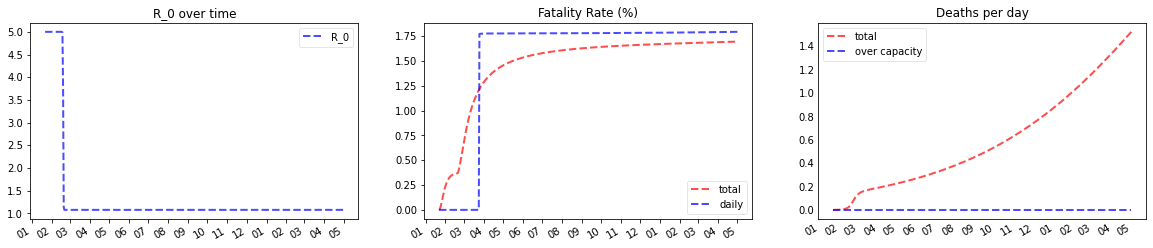

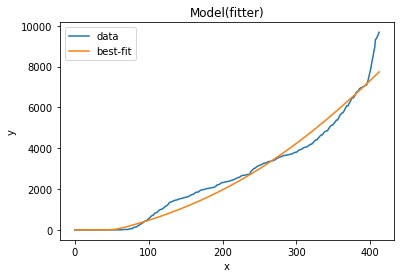

Prediction for Virginia
percentage going to ICU: 9.999999999999993; percentage dying in ICU: 29.999999999999073


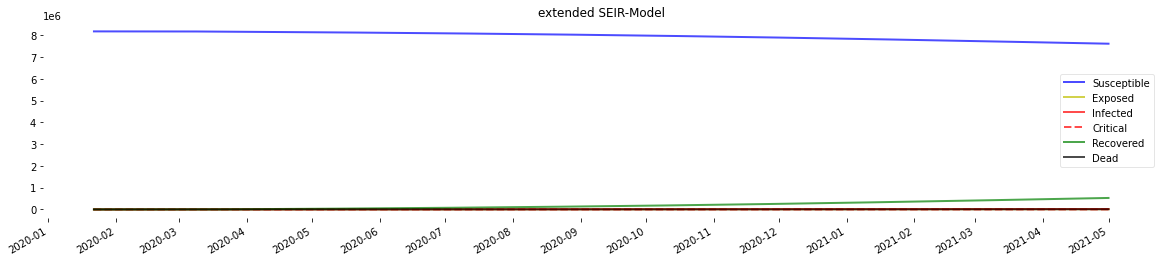

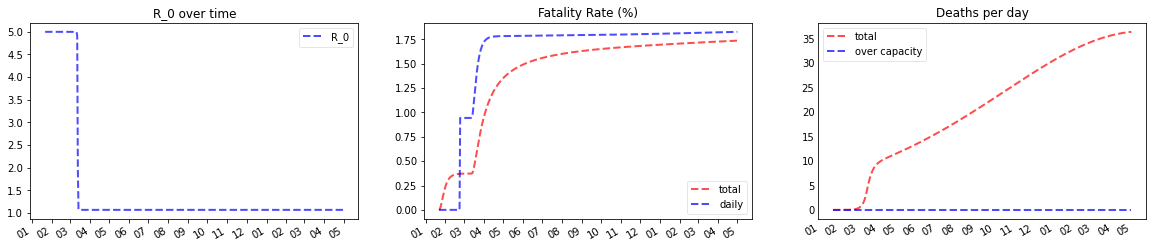

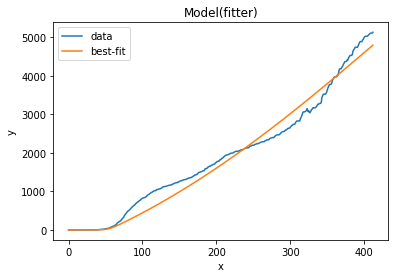

Prediction for Washington
percentage going to ICU: 9.999999999190033; percentage dying in ICU: 29.999999989702385


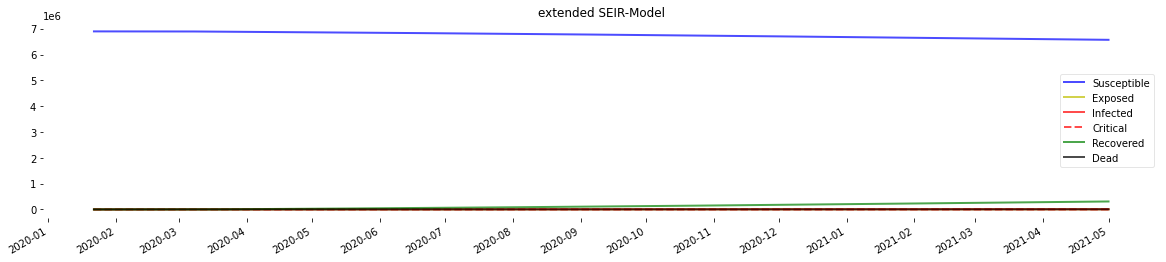

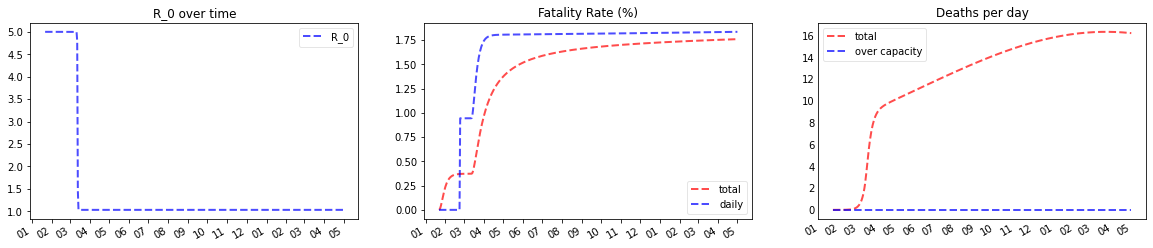

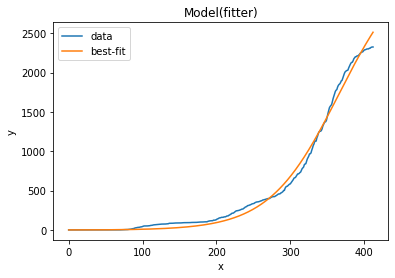

Prediction for West Virginia
percentage going to ICU: 9.965947995575869; percentage dying in ICU: 7.642140118826661


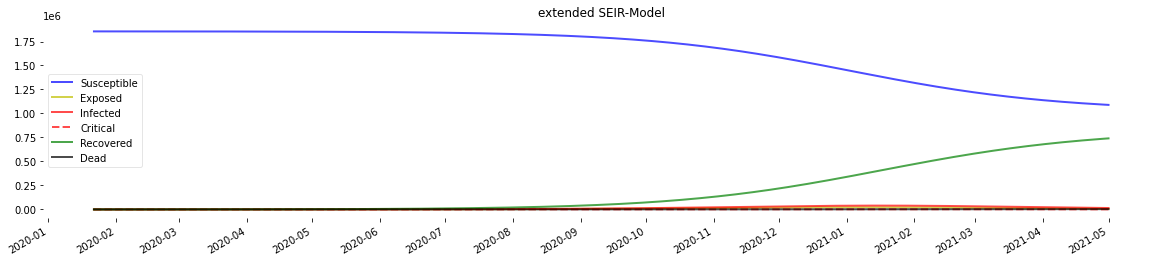

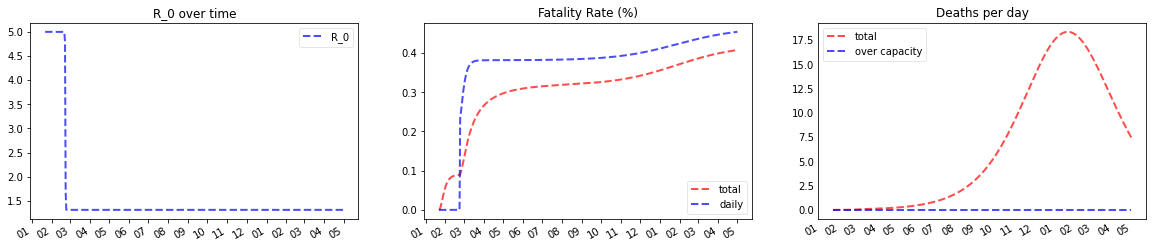

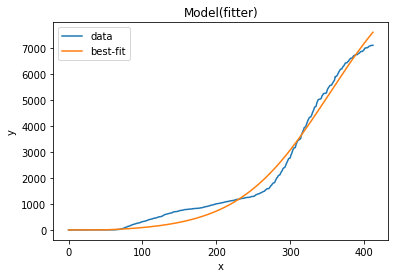

Prediction for Wisconsin
percentage going to ICU: 9.999997362439984; percentage dying in ICU: 9.08740315704655


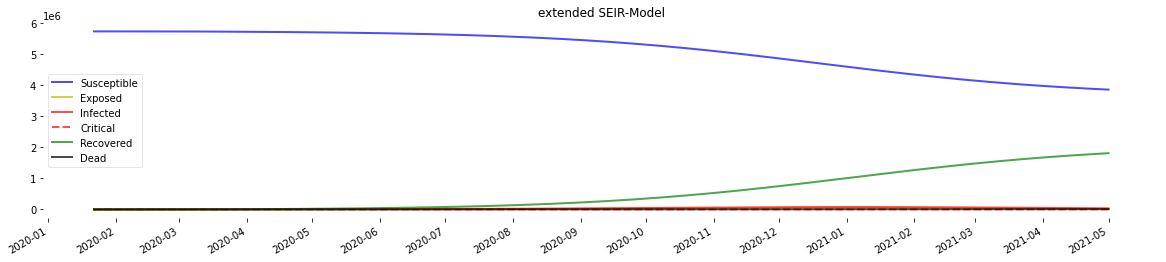

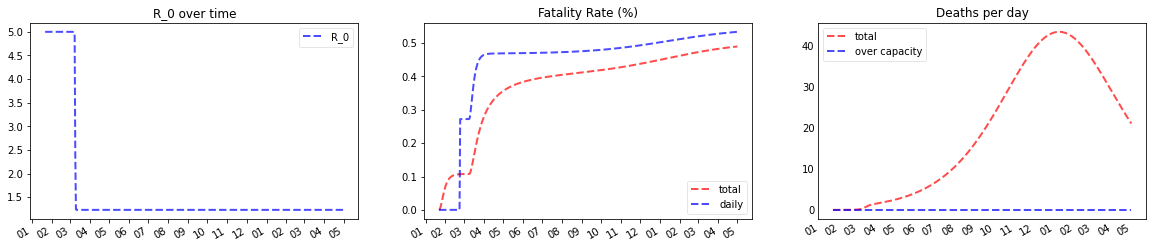

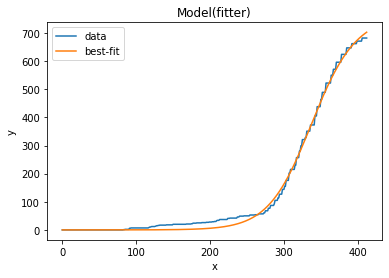

Prediction for Wyoming
percentage going to ICU: 5.015354275749917; percentage dying in ICU: 7.748278474274413


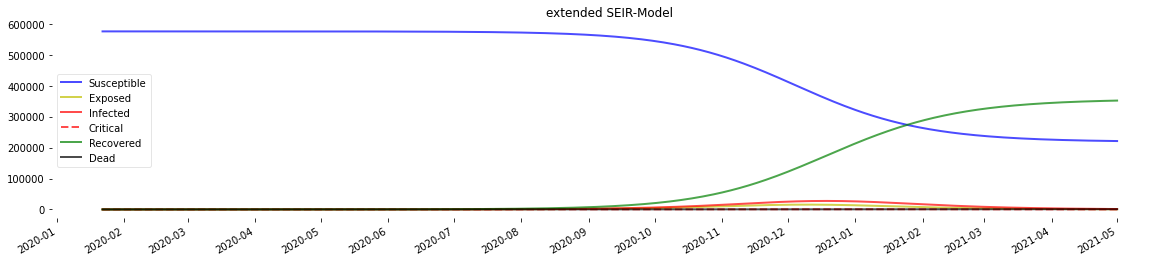

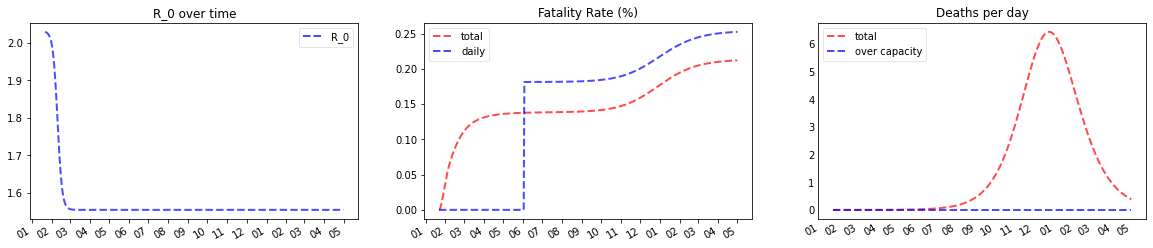

In [42]:
#best parameters for each state
best_params = {}

#saving SEIR model prediction upto april
predictions_data = pd.DataFrame(columns = ['Date','State','Cases','Deaths','Recovery','Infected'])

states = train_data['stateFIPS'].unique()

for st in states: #iterate to each state
    df = data_by_state.get_group(st)
    state_name = statecode[st] #getting it's name using the dict we created above
    beds_per_1000 = icu_beds[icu_beds['Location']==state_name]['Total'].unique()[0] #initial number of ICU beds available per 100 people
    total_pop = df['C_TOT_POP'].unique().sum()  #Total population of state
    
    st_deaths = deaths_by_state.get_group(state_name)['deaths'].values #Number of deaths 
    st_cases = deaths_by_state.get_group(state_name)['cases'].values   #Number of Cases
    
    zero = 413-len(st_deaths)  #padding length
    st_deaths = np.concatenate((np.zeros(zero), st_deaths)) #append zeros 
    st_cases = np.concatenate((np.zeros(zero), st_cases))
    
    st_deaths = st_deaths.astype('int')
    st_cases = st_cases.astype('int')
    #print(st_deaths)
    
    t = np.linspace(0,412,413) #create time stamps of 413 days for fitting the model from 20-01-2020 to 08-03-2021
    days=413

    
    #Initialize the starting value and range of parameters to fit 
    params_init_min_max = {"R_0_start": (3.0, 2.0, 5.0), "k": (2.5, 0.01, 5.0), "x0": (90, 0, 120), "R_0_end": (0.9, 0.3, 3.5),
                           "prob_I_to_C": (0.05, 0.01, 0.1), "prob_C_to_D": (0.1, 0.05, 0.3),
                           "s": (0.003, 0.001, 0.01)}  # form: {parameter: (initial guess, minimum value, max value)}
    
    #Defining a curve fitting model to fit our data
    mod = lmfit.Model(fitter)

    #setting it's initial parameters
    for kwarg, (init, mini, maxi) in params_init_min_max.items():
        mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

    params = mod.make_params()
    fit_method = "leastsq"
    
    #Fitting the model using least_square loss function
    result = mod.fit(st_deaths, params, method="least_squares", x=t.astype('int'),)
    best_params[st] = result.best_values
    
    #plotting the actual vs predicted curves
    result.plot_fit(datafmt="-")
    
    plt.savefig('Pred_Vs_Actual_Deaths/{}.png'.format(st))
    
    plt.show()
    
    
    #Making predictions upto april 30th
    full_days = 466
    first_date = np.datetime64(df.date.min())
    x_ticks = pd.date_range(start=first_date, periods=full_days, freq="D")
    print("Prediction for "+state_name)
    plotter(*Model(full_days,beds_per_1000, **result.best_values,total_pop=total_pop), x_ticks=x_ticks,state_name=state_name)
    
    pred = Model(466, beds_per_1000, **result.best_values,total_pop=total_pop)
    pred_cases = total_pop-pred[1]
    pred_deaths = pred[6]
    recover = pred[5]
    infected = pred[2]
    
    dates = pd.date_range(start='21-01-2020',periods=466)
    
    #concatenating the prediction with a dataFrame
    predictions = pd.DataFrame({'Date':dates,'State':st,'Deaths':pred_deaths,'Cases':pred_cases,'Recovery':recover,'Infected':infected})
    predictions_data = pd.concat([predictions_data,predictions])

In [43]:
predictions_data = predictions_data.reset_index()

In [44]:
predictions_data[['Cases','Deaths','Recovery','Infected']] = predictions_data[['Cases','Deaths','Recovery','Infected']].astype('int64')
predictions_data.drop('index',axis=1,inplace=True)

#Saving the prediction file into csv format
predictions_data.to_csv('pred_upto_april.csv')

In [45]:
predictions_data

Date State   Cases  Deaths  Recovery  Infected
0     2020-01-21     1       1       0         0         1
1     2020-01-22     1       1       0         0         0
2     2020-01-23     1       1       0         0         0
3     2020-01-24     1       1       0         0         0
4     2020-01-25     1       1       0         0         0
...          ...   ...     ...     ...       ...       ...
23761 2021-04-26    56  354671     750    351756       599
23762 2021-04-27    56  354770     751    351922       580
23763 2021-04-28    56  354866     751    352083       562
23764 2021-04-29    56  354959     752    352239       545
23765 2021-04-30    56  355049     752    352390       527

[23766 rows x 6 columns]

In [46]:
import pickle

file = 'best_params.pkl'

#Saving the best_params file
pickle.dump(best_params,open(file,'wb'))

In [48]:
predictions_data[predictions_data['State']==1].tail(60)

Date State   Cases  Deaths  Recovery  Infected
406 2021-03-02     1  592476    9461    526945     19435
407 2021-03-03     1  596394    9530    530690     19463
408 2021-03-04     1  600316    9599    534443     19490
409 2021-03-05     1  604243    9668    538204     19516
410 2021-03-06     1  608173    9737    541971     19540
411 2021-03-07     1  612107    9807    545746     19564
412 2021-03-08     1  616043    9877    549527     19585
413 2021-03-09     1  619983    9947    553315     19606
414 2021-03-10     1  623926   10017    557108     19625
415 2021-03-11     1  627870   10087    560908     19643
416 2021-03-12     1  631817   10157    564714     19660
417 2021-03-13     1  635766   10227    568525     19675
418 2021-03-14     1  639716   10298    572341     19689
419 2021-03-15     1  643668   10369    576162     19701
420 2021-03-16     1  647621   10439    579988     19712
421 2021-03-17     1  651574   10510    583819     19722
422 2021-03-18     1  655528   10581    587653     19731
423 2021-03-19     1  659482   10652    591492     19738
424 2021-03-20     1  663437   10723    595334     19744
425 2021-03-21     1  667390   10795    599180     19748
426 2021-03-22     1  671344   10866    603029     19751
427 2021-03-23     1  675296   10937    606881     19753
428 2021-03-24     1  679247   11009    610736     19754
429 2021-03-25     1  683197   11080    614593     19753
430 2021-03-26     1  687145   11152    618452     19751
431 2021-03-27     1  691092   11224    622313     19747
432 2021-03-28     1  695036   11296    626176     19742
433 2021-03-29     1  698977   11367    630040     19736
434 2021-03-30     1  702916   11439    633905     19728
435 2021-03-31     1  706852   11511    637771     19719
436 2021-04-01     1  710785   11583    641638     19709
437 2021-04-02     1  714714   11655    645505     19697
438 2021-04-03     1  718639   11727    649372     19684
439 2021-04-04     1  722560   11799    653239     19670
440 2021-04-05     1  726477   11871    657105     19654
441 2021-04-06     1  730390   11943    660971     19637
442 2021-04-07     1  734297   12015    664836     19619
443 2021-04-08     1  738200   12087    668700     19600
444 2021-04-09     1  742097   12159    672562     19579
445 2021-04-10     1  745988   12231    676422     19557
446 2021-04-11     1  749874   12303    680280     19533
447 2021-04-12     1  753754   12375    684136     19508
448 2021-04-13     1  757627   12447    687990     19483
449 2021-04-14     1  761493   12519    691841     19455
450 2021-04-15     1  765353   12591    695688     19427
451 2021-04-16     1  769206   12663    699533     19397
452 2021-04-17     1  773051   12735    703374     19366
453 2021-04-18     1  776889   12806    707211     19334
454 2021-04-19     1  780719   12878    711044     19300
455 2021-04-20     1  784541   12950    714873     19266
456 2021-04-21     1  788355   13021    718697     19230
457 2021-04-22     1  792160   13093    722516     19193
458 2021-04-23     1  795957   13165    726330     19154
459 2021-04-24     1  799744   13236    730139     19115
460 2021-04-25     1  803523   13307    733943     19074
461 2021-04-26     1  807292   13379    737740     19032
462 2021-04-27     1  811051   13450    741532     18989
463 2021-04-28     1  814801   13521    745317     18945
464 2021-04-29     1  818540   13592    749096     18900
465 2021-04-30     1  822269   13663    752868     18854